In [1]:
# Created 20Mar23
# To create df of clinics system sizes for heatmaps of S1-S4 with mean emissions intensity
# Second part of this code is for plotting
# See Jupyter notebook: 'emi_clinics_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'trial_heatmap.py'


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd    # pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s1 = s1[s1.Institution != 'School']
# to check there are 18 clinics
clinics_s1["Site_name"].count()  # returns 18

18

In [3]:
clinics_s1["Emissions_intensity"].describe().round(2)  
# to know emissions values (all clinics)

count      18.00
mean      358.94
std       230.60
min       227.88
25%       265.49
50%       296.09
75%       331.56
max      1252.26
Name: Emissions_intensity, dtype: float64

In [4]:
clinics_s1 # to show in Jupyter

,Site_name,County,Initial_PV_size,Initial_storage_size,Final_PV_size,Final_storage_size,LCUE,Emissions_intensity,Cumulative_system_cost,Cumulative_system_GHG,Blackouts,Unmet_energy_fraction,Institution
13,Boyani_Dispensary,Kilifi,1.855,6.0,1.577,5.631,0.644,262.819,5472.092,3975.885,0.0,0.0,Clinic
16,Busa_Dispensary,Kwale,1.590,8.0,1.352,7.644,0.797,281.034,6030.762,3775.330,0.0,0.0,Clinic
18,Chingombero_Dispensary,Kwale,1.590,5.0,1.352,4.774,0.781,317.942,5263.392,3817.330,0.0,0.0,Clinic
21,Dadacha_Basa_Dispensary,Isiolo,3.180,9.0,2.703,8.500,0.602,287.923,7553.742,6408.660,0.0,0.0,Clinic
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,2.120,8.0,1.802,7.707,0.920,381.616,6771.052,4988.440,0.0,0.0,Clinic
54,Kavunyalo_Dispensary,Kilifi,2.650,8.0,2.253,7.423,0.606,273.499,6796.082,5457.550,0.0,0.0,Clinic
78,Mabesheni_Dispensary,Kwale,1.855,6.0,1.577,5.526,0.560,227.878,5472.092,3975.885,0.0,0.0,Clinic
86,Makamini_Dispensary,Kwale,0.795,5.0,0.676,4.853,1.165,329.808,4331.772,2183.665,0.0,0.0,Clinic
98,Mazola_Dispensary,Kwale,1.325,5.0,1.126,4.757,0.926,332.146,4714.432,3024.775,0.0,0.0,Clinic
102,Mbulia_Dispensary,Taita_Taveta,0.530,3.0,0.450,2.816,0.991,252.766,3390.442,1543.110,0.0,0.0,Clinic


In [5]:
# Emissions intensity
# Groups clinics by Initial storage and PV size and calculates average emi in that bin
emi_clinics_s1 = clinics_s1.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_clinics_s1 = emi_clinics_s1.to_frame()
emi_clinics_s1.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
3.0                  0.530                         252.77
5.0                  0.795                         329.81
                     1.325                         332.15
                     1.590                         317.94
6.0                  1.855                         245.35
                     2.120                         285.96
7.0                  1.855                         245.28
8.0                  1.590                         281.03
                     2.120                         381.62
                     2.650                         288.88
9.0                  3.180                         287.92
10.0                 1.590                         243.69
11.0                 3.180                         321.99
15.0                 2.385                         423.52
16.0                 3.975                         436.58
29.0                 5.830                        1252.26

In [6]:
# to know clinics min and max average emi values (vmin & vmax)
emi_clinics_s1["Emissions_intensity"].describe().round(3)
                    # returns: min= 243.687  (vmin), max= 1252.262 (vmax)
                    # returns count != than 18 because some sites have same size

count      16.000
mean      370.421
std       242.620
min       243.687
25%       273.967
50%       303.412
75%       344.514
max      1252.262
Name: Emissions_intensity, dtype: float64

In [7]:
# Pivot df to be able to do heatmap
emi_clinics_s1_hp = emi_clinics_s1.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_clinics_s1_hp.round(2) # to show in Jupyter

Initial_PV_size,0.530,0.795,1.325,1.590,1.855,2.120,2.385,2.650,3.180,3.975,5.830
Initial_storage_size,,,,,,,,,,,
3.0,252.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,329.81,332.15,317.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,245.35,285.96,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,245.28,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,281.03,NaN,381.62,NaN,288.88,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.92,NaN,NaN
10.0,NaN,NaN,NaN,243.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.99,NaN,NaN
15.0,NaN,NaN,NaN,NaN,NaN,NaN,423.52,NaN,NaN,NaN,NaN


In [8]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

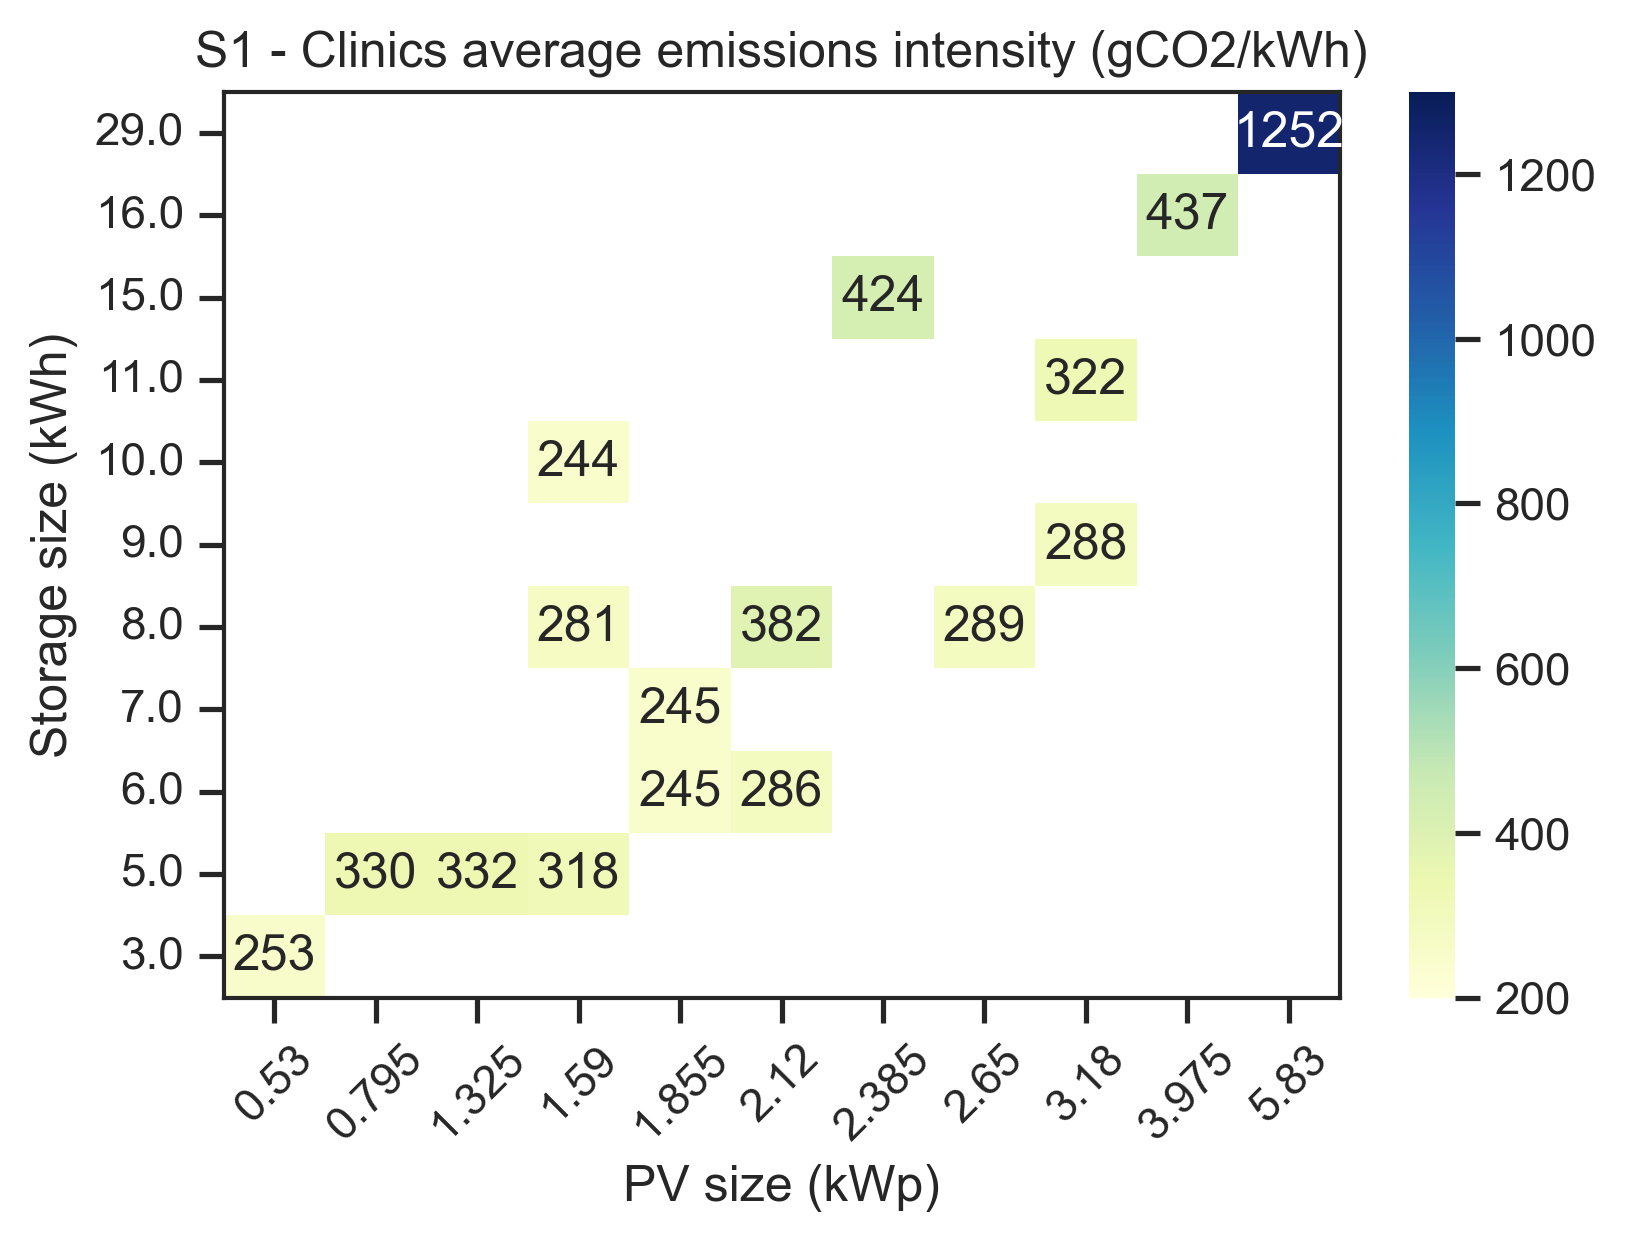

In [9]:
# S1 CLINIC emi PLOT (to plot data as it is - delete vmin and vmax for raw plot)
ax = sns.heatmap(emi_clinics_s1_hp, vmin=200, vmax=1300, cmap="YlGnBu", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(8.5,9.5, marker="D", color= "black", ms="5")  # or "black", "dimgrey"

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

# at the end try plotting with variable: "emi_clinics_s1_hp_ext"

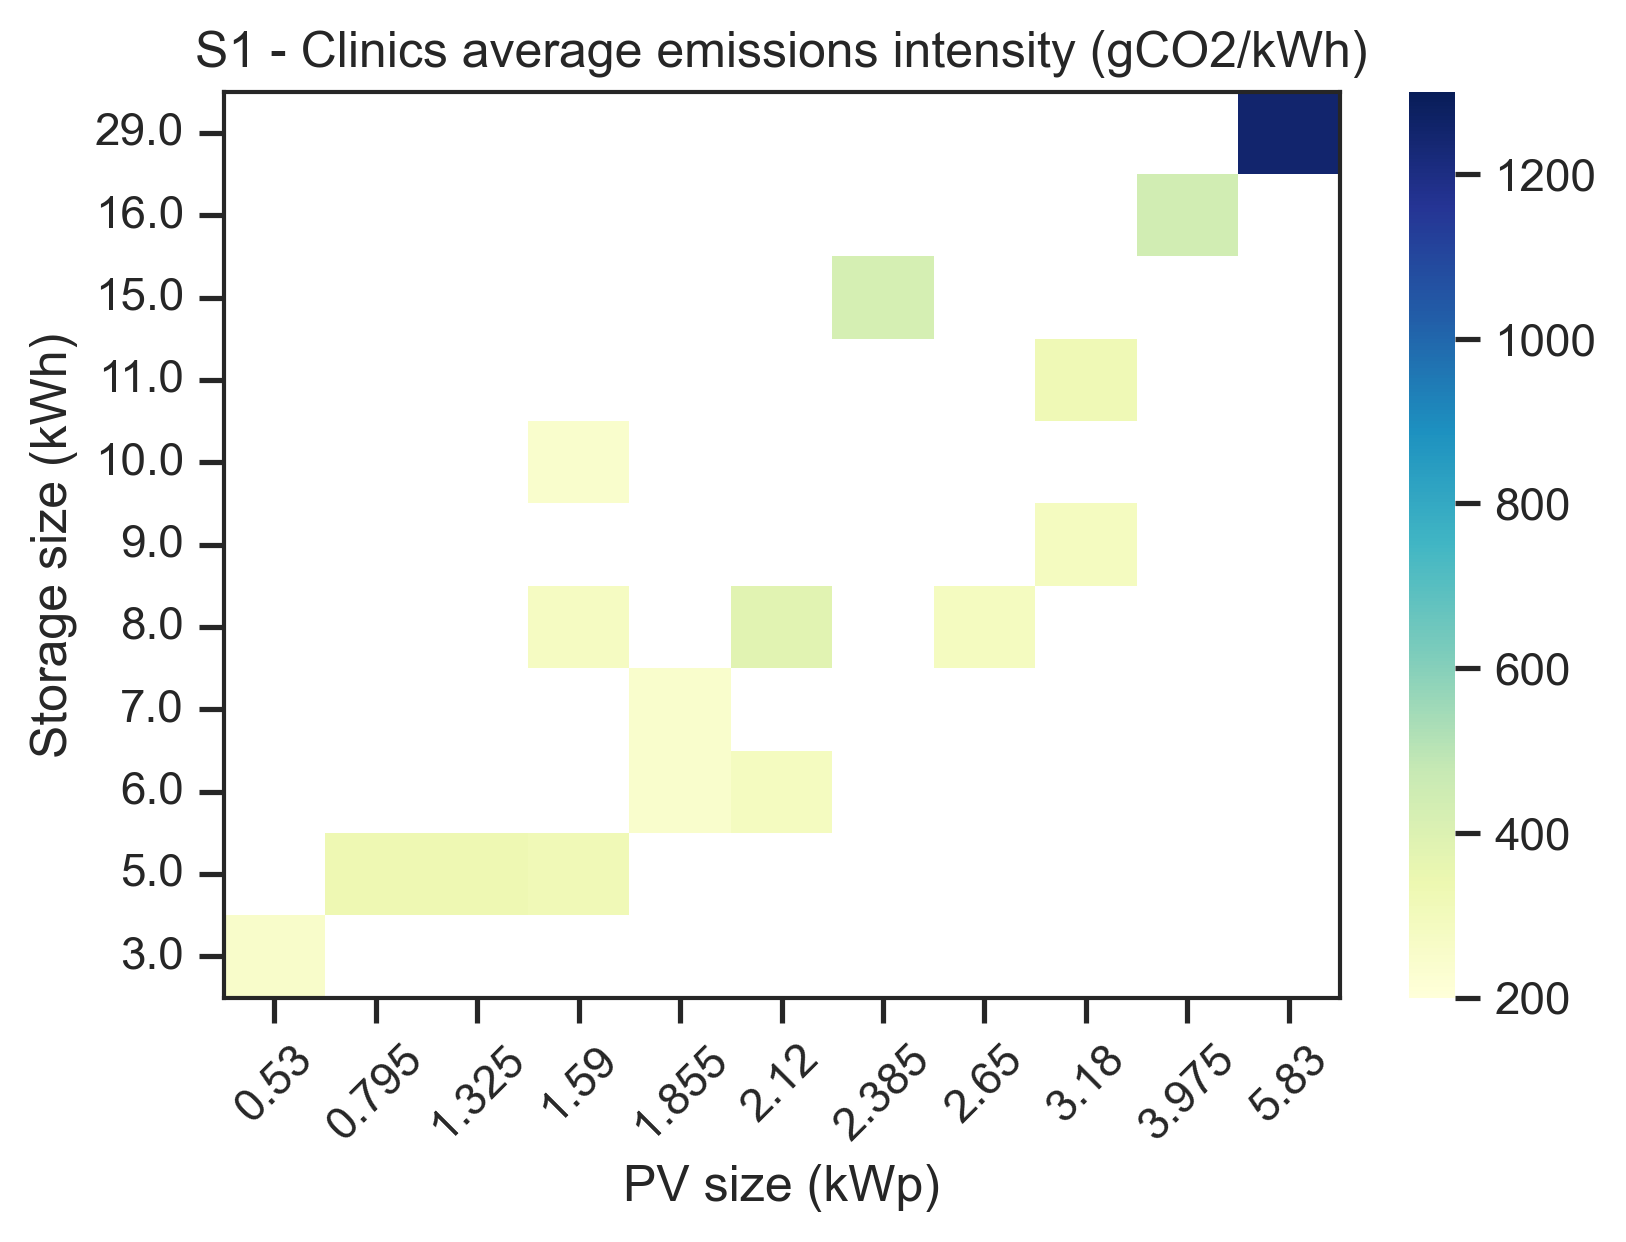

In [10]:
# S1 CLINIC emi PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_clinics_s1_hp, vmin=200, vmax=1300, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(8.5,9.5, marker="D", color= "black", ms="5")  # or "black", "dimgrey"

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

# at the end try plotting with variable: "emi_clinics_s1_hp_ext"

In [11]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s2 = s2[s2.Institution != 'School']
# to check there are 18 clinics
clinics_s2["Site_name"].count()  # returns 18

18

In [12]:
clinics_s2["Emissions_intensity"].describe().round(2)  
# to know emissions values (all clinics)

count     18.00
mean     287.35
std      169.28
min      174.52
25%      210.72
50%      248.40
75%      280.63
max      927.53
Name: Emissions_intensity, dtype: float64

In [13]:
clinics_s2 # to show in Jupyter

,Site_name,County,Initial_PV_size,Initial_storage_size,Final_PV_size,Final_storage_size,LCUE,Emissions_intensity,Cumulative_system_cost,Cumulative_system_GHG,Blackouts,Unmet_energy_fraction,Institution
13,Boyani_Dispensary,Kilifi,1.325,3.0,1.126,2.633,0.470,186.794,3964.432,2804.775,0.005,0.008,Clinic
16,Busa_Dispensary,Kwale,1.590,5.0,1.352,4.648,0.654,258.554,4905.762,3445.330,0.003,0.008,Clinic
18,Chingombero_Dispensary,Kwale,1.325,3.0,1.126,2.776,0.646,266.837,4322.062,3176.775,0.006,0.009,Clinic
21,Dadacha_Basa_Dispensary,Isiolo,1.855,5.0,1.577,4.500,0.410,175.306,5097.092,3865.885,0.007,0.010,Clinic
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,1.590,6.0,1.352,5.707,0.772,303.232,5638.392,3927.330,0.005,0.010,Clinic
54,Kavunyalo_Dispensary,Kilifi,1.855,5.0,1.577,4.426,0.459,195.600,5097.092,3865.885,0.005,0.010,Clinic
78,Mabesheni_Dispensary,Kwale,1.325,5.0,1.126,4.528,0.485,174.523,4714.432,3024.775,0.006,0.007,Clinic
86,Makamini_Dispensary,Kwale,0.795,2.0,0.676,1.855,0.870,282.412,3206.772,1853.665,0.003,0.008,Clinic
98,Mazola_Dispensary,Kwale,1.060,3.0,0.901,2.760,0.747,264.019,3773.102,2384.220,0.004,0.009,Clinic
102,Mbulia_Dispensary,Taita_Taveta,0.530,2.0,0.450,1.819,0.890,237.213,3015.442,1433.110,0.005,0.010,Clinic


In [14]:
# Emissions intensity
# Groups clinics by Initial storage and PV size and calculates average emi in that bin
emi_clinics_s2 = clinics_s2.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_clinics_s2 = emi_clinics_s2.to_frame()
emi_clinics_s2.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
2.0                  0.530                         237.21
                     0.795                         282.41
3.0                  1.060                         264.02
                     1.325                         226.82
4.0                  1.590                         218.21
5.0                  1.325                         174.52
                     1.590                         233.39
                     1.855                         203.05
6.0                  1.590                         303.23
                     1.855                         233.24
9.0                  2.650                         275.30
13.0                 2.120                         383.21
                     2.915                         343.79
26.0                 3.710                         927.53

In [15]:
# to know clinics min and max average emi values (vmin & vmax)
emi_clinics_s2["Emissions_intensity"].describe().round(3)
                    # returns: min= 174.523 (vmin), max= 927.531 (vmax)
                    # returns count != than 18 because some sites have same size

count     14.000
mean     307.567
std      186.895
min      174.523
25%      228.422
50%      250.616
75%      298.027
max      927.531
Name: Emissions_intensity, dtype: float64

In [16]:
# Pivot df to be able to do heatmap
emi_clinics_s2_hp = emi_clinics_s2.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_clinics_s2_hp.round(2) # to show in Jupyter

Initial_PV_size,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.650,2.915,3.710
Initial_storage_size,,,,,,,,,,
2.0,237.21,282.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,264.02,226.82,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,218.21,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,174.52,233.39,203.05,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,303.23,233.24,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.3,NaN,NaN
13.0,NaN,NaN,NaN,NaN,NaN,NaN,383.21,NaN,343.79,NaN
26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927.53


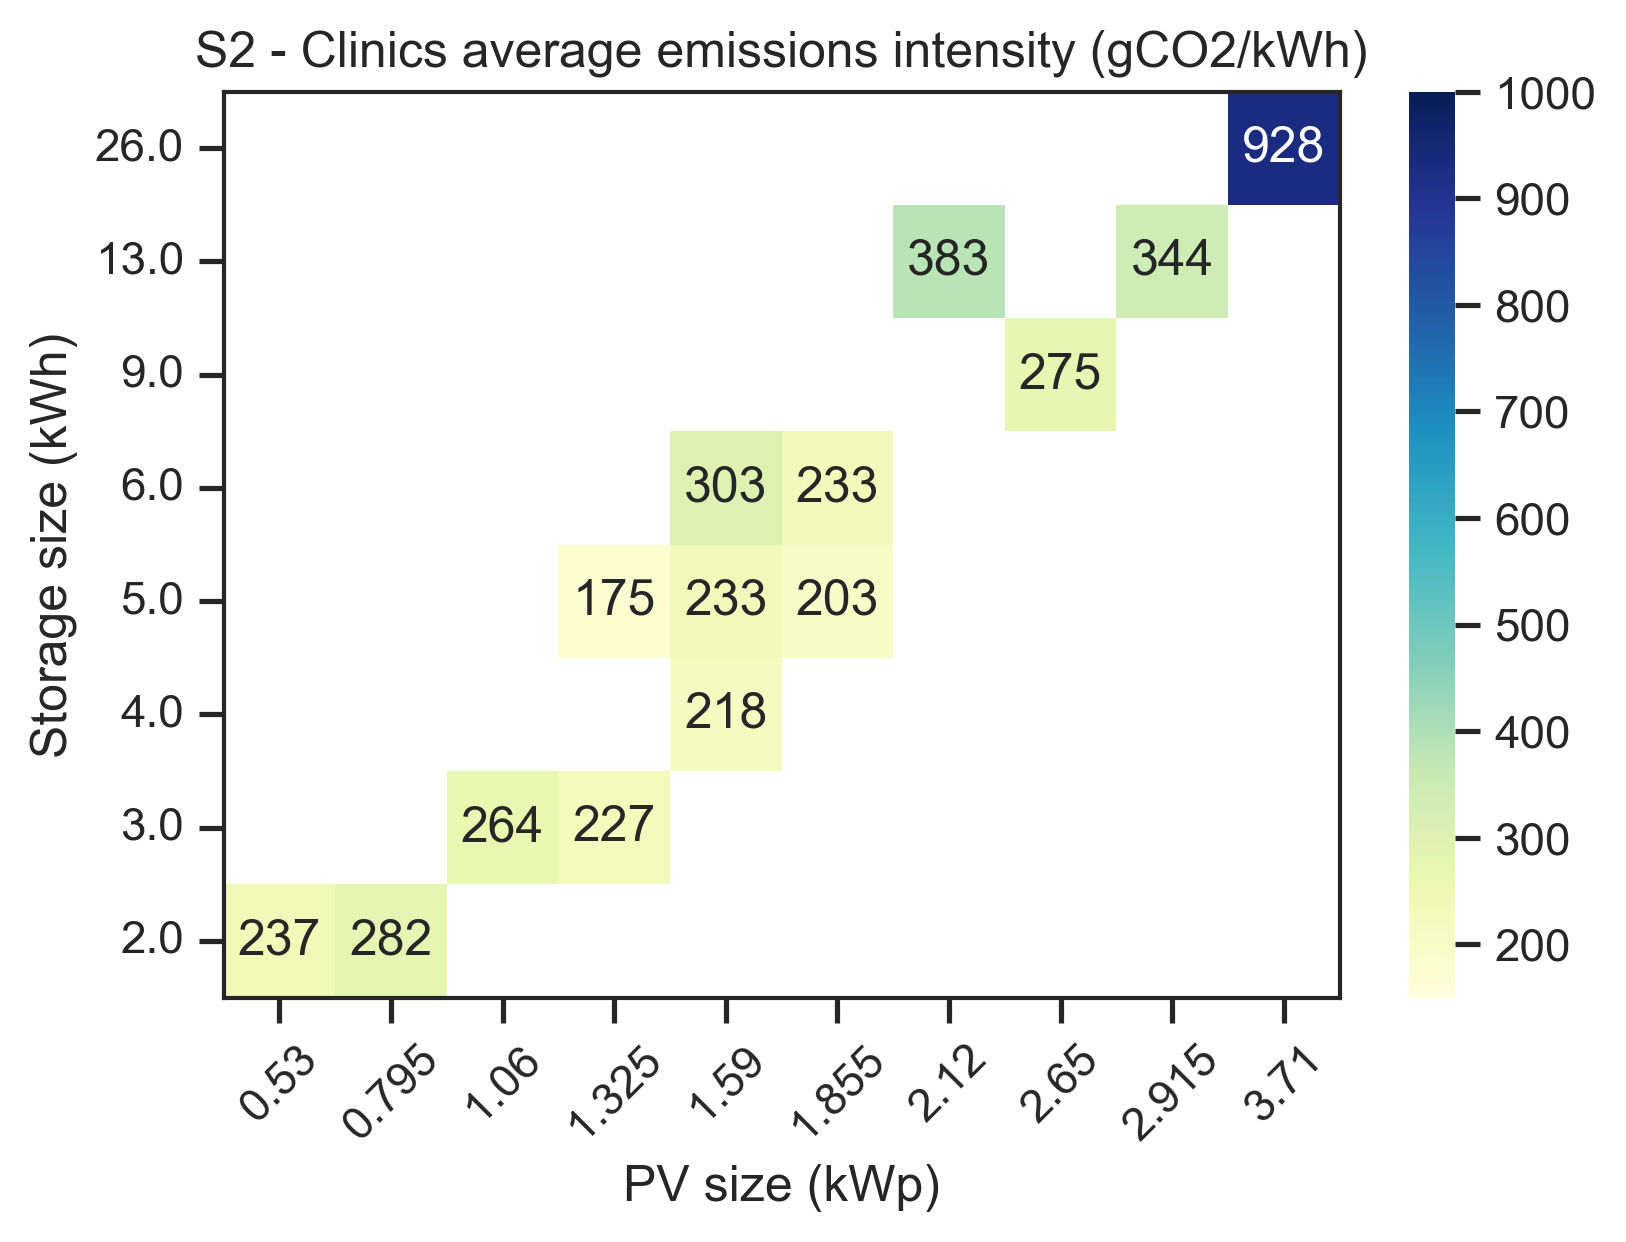

In [17]:
# S2 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_clinics_s2_hp, vmin=150, vmax=1000, cmap="YlGnBu", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

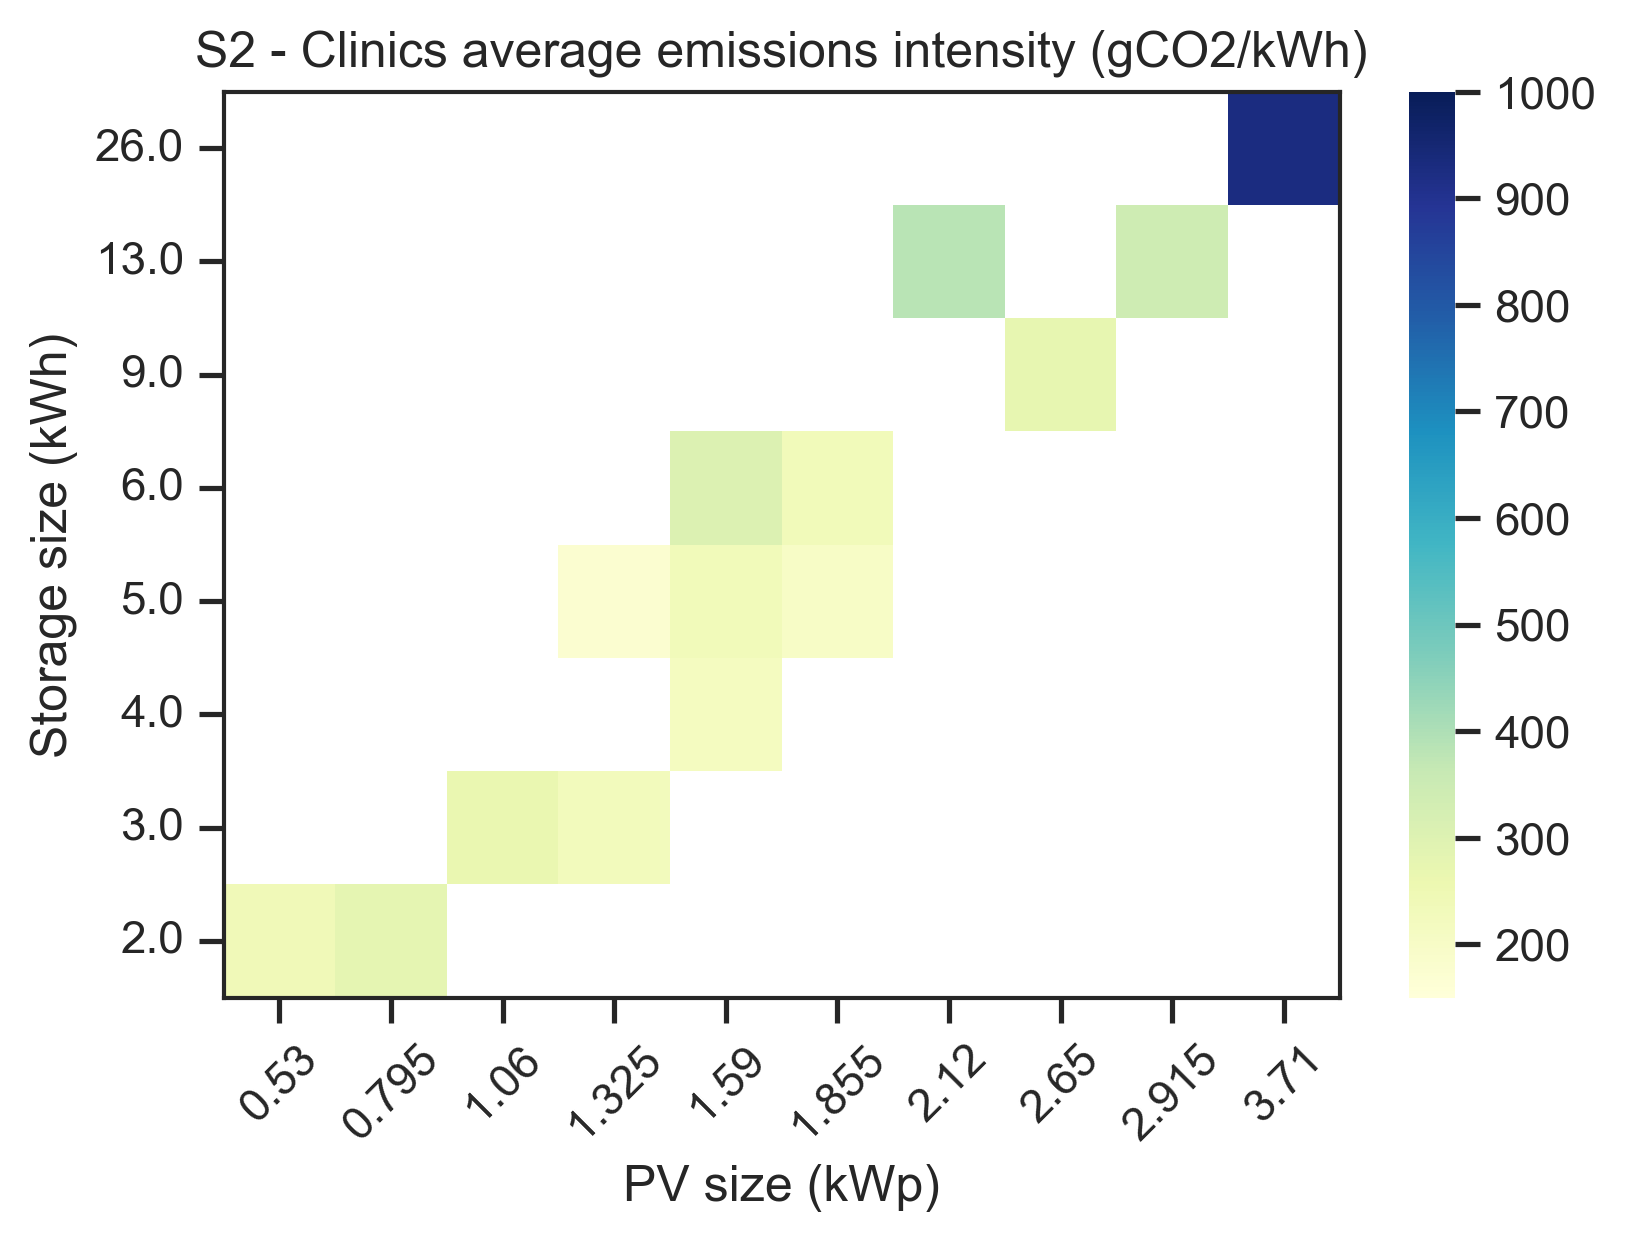

In [18]:
# S2 CLINIC SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_clinics_s2_hp, vmin=150, vmax=1000, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [19]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s3 = s3[s3.Institution != 'School']

# to check there are 18 clinics
clinics_s3["Site_name"].count()  # returns 18

18

In [20]:
clinics_s3["Emissions_intensity"].describe().round(2) 
# to know emi values (all clinics)

count     18.00
mean     239.93
std      151.53
min      133.97
25%      165.03
50%      200.15
75%      250.23
max      804.09
Name: Emissions_intensity, dtype: float64

In [21]:
clinics_s3 # to show in Jupyter

,Site_name,County,Initial_PV_size,Initial_storage_size,Final_PV_size,Final_storage_size,LCUE,Emissions_intensity,Cumulative_system_cost,Cumulative_system_GHG,Blackouts,Unmet_energy_fraction,Institution
13,Boyani_Dispensary,Kilifi,0.795,3.0,0.676,2.641,0.434,133.966,3581.772,1963.665,0.028,0.031,Clinic
16,Busa_Dispensary,Kwale,1.060,4.0,0.901,3.659,0.567,192.212,4148.102,2494.220,0.017,0.034,Clinic
18,Chingombero_Dispensary,Kwale,1.060,2.0,0.901,1.786,0.577,228.708,3755.732,2646.220,0.029,0.036,Clinic
21,Dadacha_Basa_Dispensary,Isiolo,1.325,4.0,1.126,3.520,0.361,136.937,4339.432,2914.775,0.039,0.044,Clinic
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,1.325,4.0,1.126,3.718,0.663,261.679,4697.062,3286.775,0.020,0.039,Clinic
54,Kavunyalo_Dispensary,Kilifi,1.590,4.0,1.352,3.450,0.420,174.530,4530.762,3335.330,0.039,0.041,Clinic
78,Mabesheni_Dispensary,Kwale,1.060,4.0,0.901,3.549,0.441,149.125,4148.102,2494.220,0.036,0.040,Clinic
86,Makamini_Dispensary,Kwale,0.530,1.0,0.450,0.862,0.743,209.738,2640.442,1323.110,0.032,0.046,Clinic
98,Mazola_Dispensary,Kwale,0.530,3.0,0.450,2.766,0.690,176.311,3390.442,1543.110,0.023,0.039,Clinic
102,Mbulia_Dispensary,Taita_Taveta,0.530,2.0,0.450,1.819,0.890,237.213,3015.442,1433.110,0.005,0.010,Clinic


In [22]:
# Emissions intensity
# Groups clinics by Initial storage and PV size and calculates average emi in that bin
emi_clinics_s3 = clinics_s3.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_clinics_s3 = emi_clinics_s3.to_frame()
emi_clinics_s3.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.530                         209.74
2.0                  0.530                         237.21
                     1.060                         228.71
3.0                  0.530                         176.31
                     0.795                         133.97
                     1.060                         161.86
                     1.590                         207.30
4.0                  1.060                         165.59
                     1.325                         199.31
                     1.590                         174.53
5.0                  1.325                         193.00
7.0                  2.385                         254.57
10.0                 2.650                         320.81
11.0                 1.590                         321.26
18.0                 3.180                         804.09

In [23]:
# to know clinics min and max average emi values (vmin & vmax)
emi_clinics_s3["Emissions_intensity"].describe().round(3)
                    # returns: min= 133.966 (vmin), max= 804.086 (vmax)
                    # returns count != than 18 because some sites have same size

count     15.000
mean     252.550
std      161.774
min      133.966
25%      175.420
50%      207.300
75%      245.892
max      804.086
Name: Emissions_intensity, dtype: float64

In [24]:
# Pivot df to be able to do heatmap
emi_clinics_s3_hp = emi_clinics_s3.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")

In [25]:
emi_clinics_s3_hp.round(2) # to show in Jupyter

Initial_PV_size,0.530,0.795,1.060,1.325,1.590,2.385,2.650,3.180
Initial_storage_size,,,,,,,,
1.0,209.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,237.21,NaN,228.71,NaN,NaN,NaN,NaN,NaN
3.0,176.31,133.97,161.86,NaN,207.30,NaN,NaN,NaN
4.0,NaN,NaN,165.59,199.31,174.53,NaN,NaN,NaN
5.0,NaN,NaN,NaN,193.00,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,254.57,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,320.81,NaN
11.0,NaN,NaN,NaN,NaN,321.26,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.09


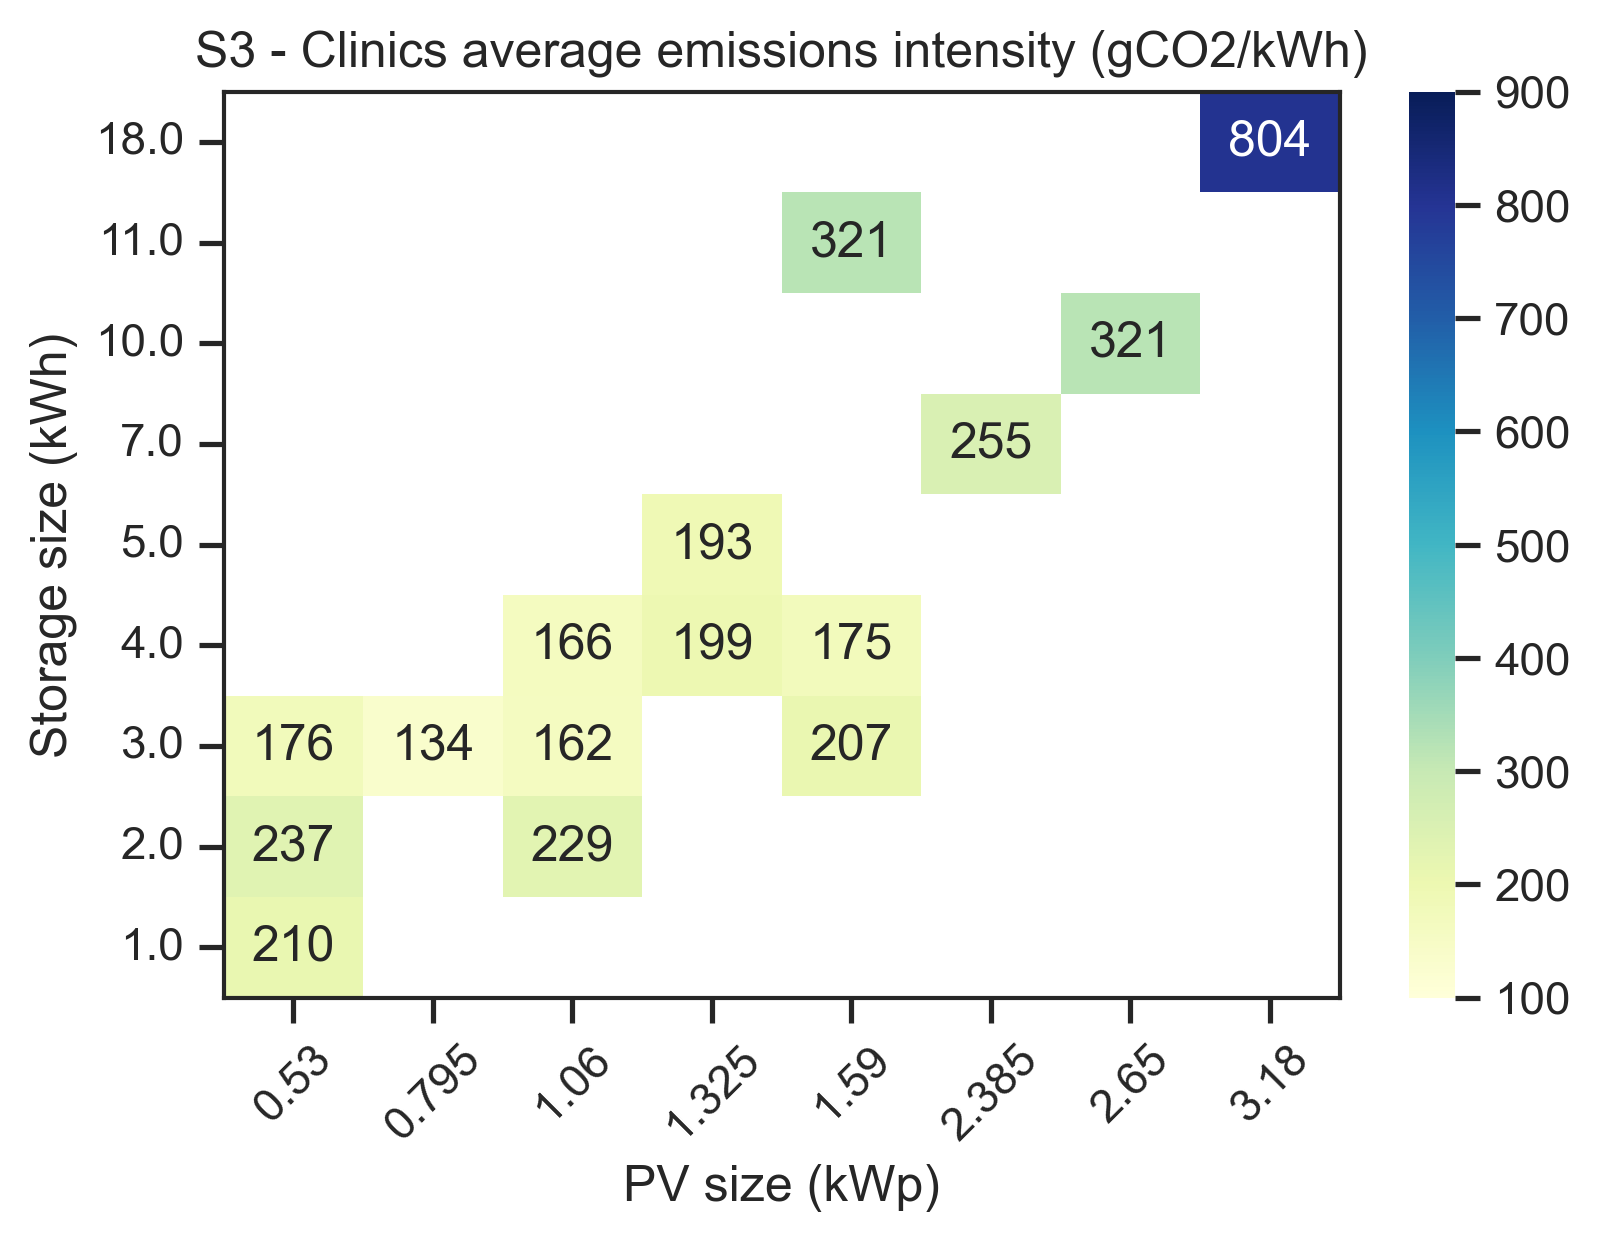

In [26]:
# S3 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_clinics_s3_hp, vmin=100, vmax=900, cmap="YlGnBu", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

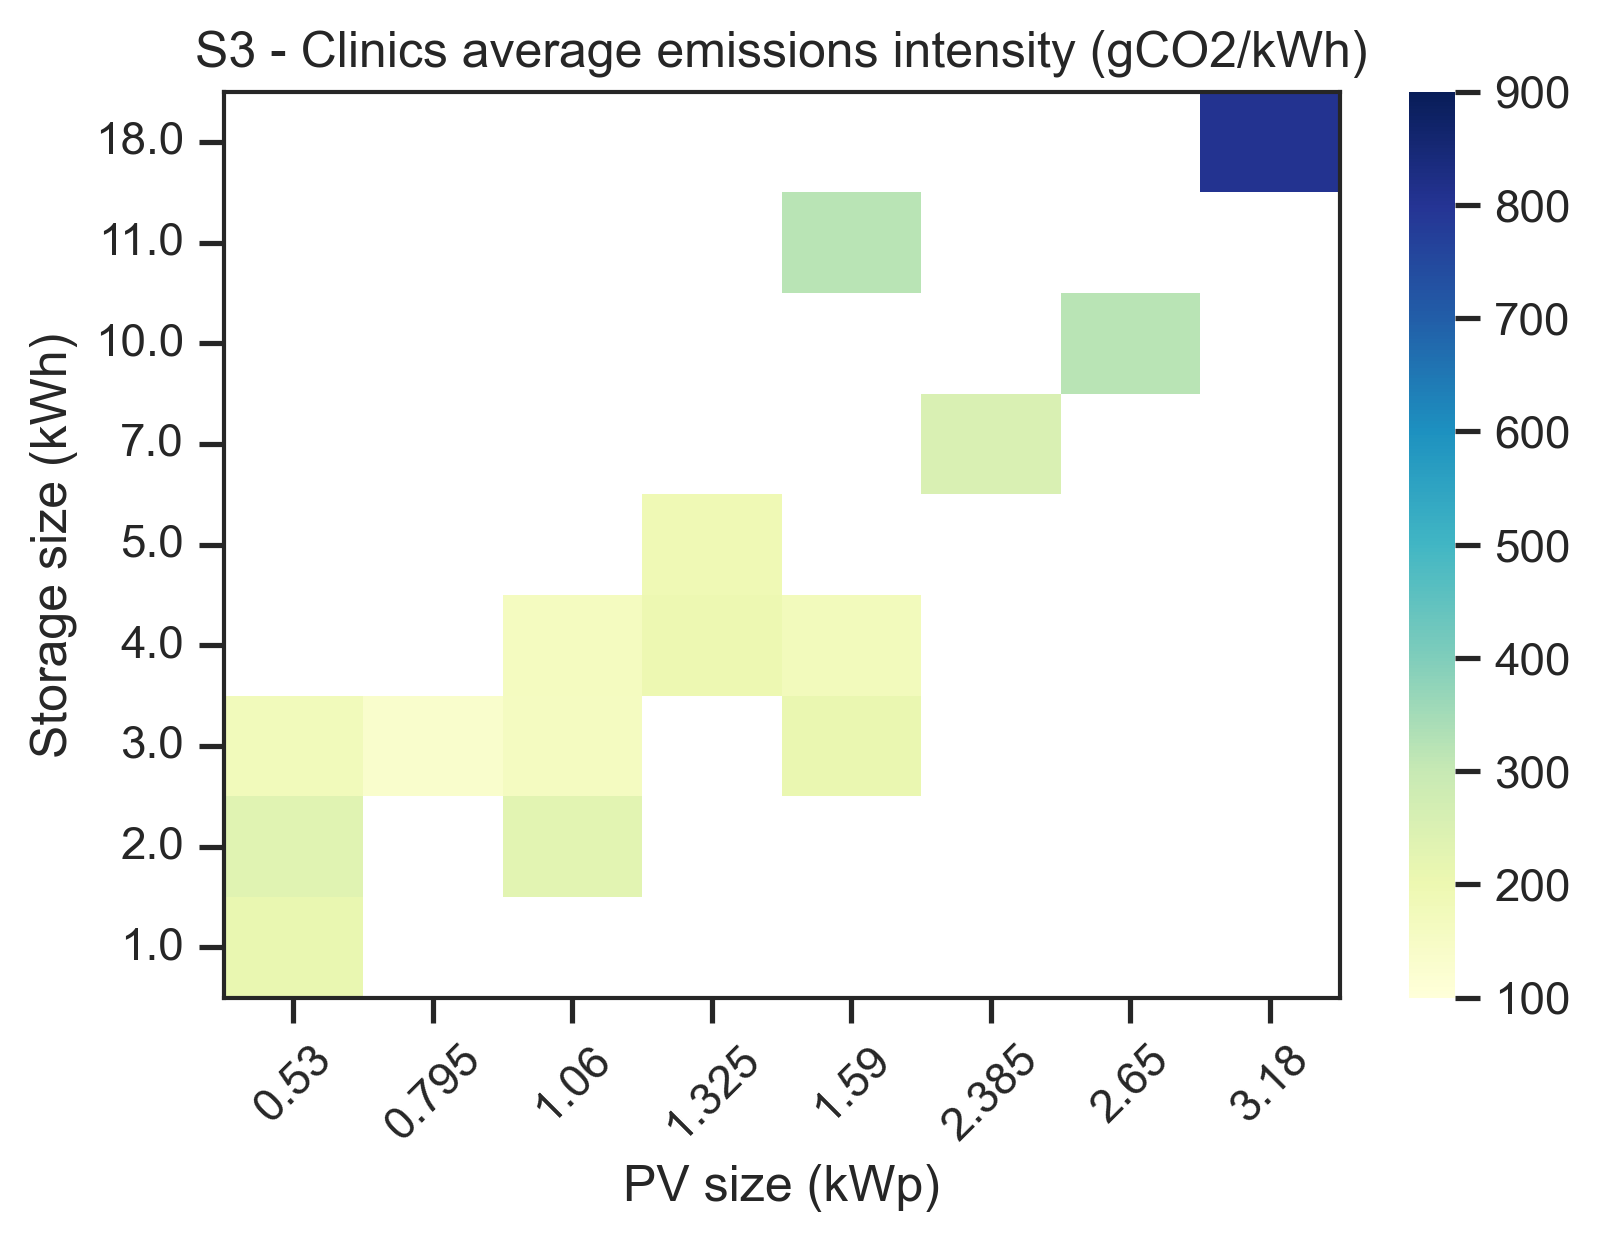

In [27]:
# S3 CLINIC SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_clinics_s3_hp, vmin=100, vmax=900, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [28]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s4 = s4[s4.Institution != 'School']

# to check there are 18 clinics
clinics_s4["Site_name"].count()  # returns 18

18

In [29]:
clinics_s4["Emissions_intensity"].describe().round(2)  
# to know emi values (all clinics)

count     18.00
mean     219.95
std      143.11
min      133.97
25%      158.36
50%      174.46
75%      226.43
max      759.69
Name: Emissions_intensity, dtype: float64

In [30]:
clinics_s4 # to show in Jupyter

,Site_name,County,Initial_PV_size,Initial_storage_size,Final_PV_size,Final_storage_size,LCUE,Emissions_intensity,Cumulative_system_cost,Cumulative_system_GHG,Blackouts,Unmet_energy_fraction,Institution
13,Boyani_Dispensary,Kilifi,0.795,3.0,0.676,2.641,0.434,133.966,3581.772,1963.665,0.028,0.031,Clinic
16,Busa_Dispensary,Kwale,0.795,3.0,0.676,2.685,0.519,160.489,3581.772,1963.665,0.050,0.088,Clinic
18,Chingombero_Dispensary,Kwale,0.795,2.0,0.676,1.791,0.564,198.233,3564.402,2225.665,0.058,0.064,Clinic
21,Dadacha_Basa_Dispensary,Isiolo,1.325,4.0,1.126,3.520,0.361,136.937,4339.432,2914.775,0.039,0.044,Clinic
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,1.060,3.0,0.901,2.740,0.616,231.995,4130.732,2756.220,0.048,0.090,Clinic
54,Kavunyalo_Dispensary,Kilifi,1.060,4.0,0.901,3.469,0.397,135.210,4148.102,2494.220,0.064,0.075,Clinic
78,Mabesheni_Dispensary,Kwale,1.060,4.0,0.901,3.549,0.441,149.125,4148.102,2494.220,0.036,0.040,Clinic
86,Makamini_Dispensary,Kwale,0.530,1.0,0.450,0.862,0.743,209.738,2640.442,1323.110,0.032,0.046,Clinic
98,Mazola_Dispensary,Kwale,0.530,2.0,0.450,1.780,0.639,170.629,3015.442,1433.110,0.052,0.077,Clinic
102,Mbulia_Dispensary,Taita_Taveta,0.265,2.0,0.225,1.831,0.880,178.291,2824.112,1012.555,0.045,0.069,Clinic


In [31]:
# Emissions intensity
# Groups clinics by Initial storage and PV size and calculates average emi in that bin
emi_clinics_s4 = clinics_s4.groupby(["Initial_storage_size","Initial_PV_size"])["Emissions_intensity"].mean()

# Convert series to df
emi_clinics_s4 = emi_clinics_s4.to_frame()
emi_clinics_s4.round(2) # to show in Jupyter

Emissions_intensity
Initial_storage_size Initial_PV_size                     
1.0                  0.530                         209.74
2.0                  0.265                         178.29
                     0.530                         170.63
                     0.795                         198.23
3.0                  0.795                         147.23
                     1.060                         177.93
4.0                  1.060                         142.17
                     1.325                         164.95
6.0                  2.120                         241.10
9.0                  1.325                         292.54
                     2.120                         288.42
14.0                 2.915                         759.69

In [32]:
# to know clinics min and max average emi values (vmin & vmax)
emi_clinics_s4["Emissions_intensity"].describe().round(3)
                    # returns: min= 142.168 (vmin), max= 759.693 (vmax)
                    # returns count != than 18 because some sites have same size

count     12.000
mean     247.578
std      168.804
min      142.168
25%      169.210
50%      188.262
75%      252.934
max      759.693
Name: Emissions_intensity, dtype: float64

In [33]:
# Pivot df to be able to do heatmap
emi_clinics_s4_hp = emi_clinics_s4.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Emissions_intensity")
emi_clinics_s4_hp.round(2) # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,2.120,2.915
Initial_storage_size,,,,,,,
1.0,NaN,209.74,NaN,NaN,NaN,NaN,NaN
2.0,178.29,170.63,198.23,NaN,NaN,NaN,NaN
3.0,NaN,NaN,147.23,177.93,NaN,NaN,NaN
4.0,NaN,NaN,NaN,142.17,164.95,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,241.10,NaN
9.0,NaN,NaN,NaN,NaN,292.54,288.42,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,759.69


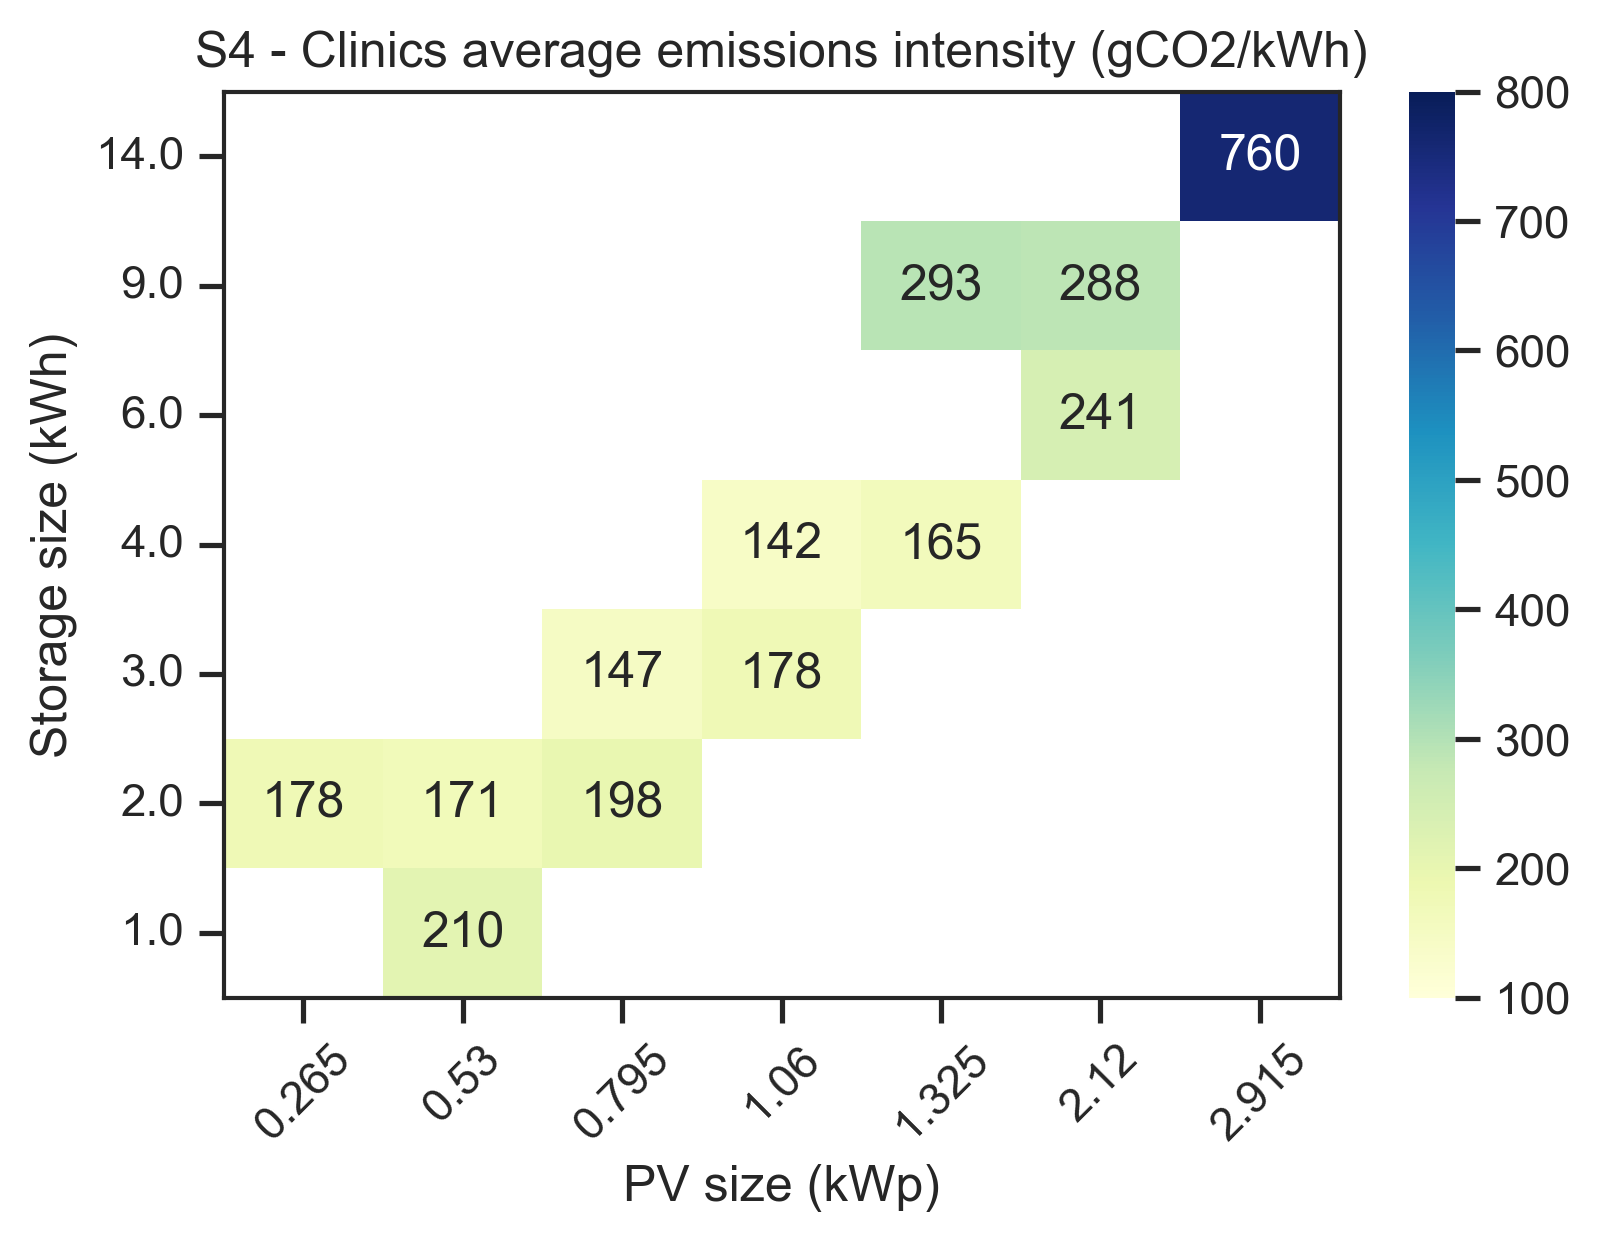

In [34]:
# S4 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(emi_clinics_s4_hp, vmin=100, vmax=800, cmap="YlGnBu", annot=True, fmt=".0f")
ax.invert_yaxis()
ax.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

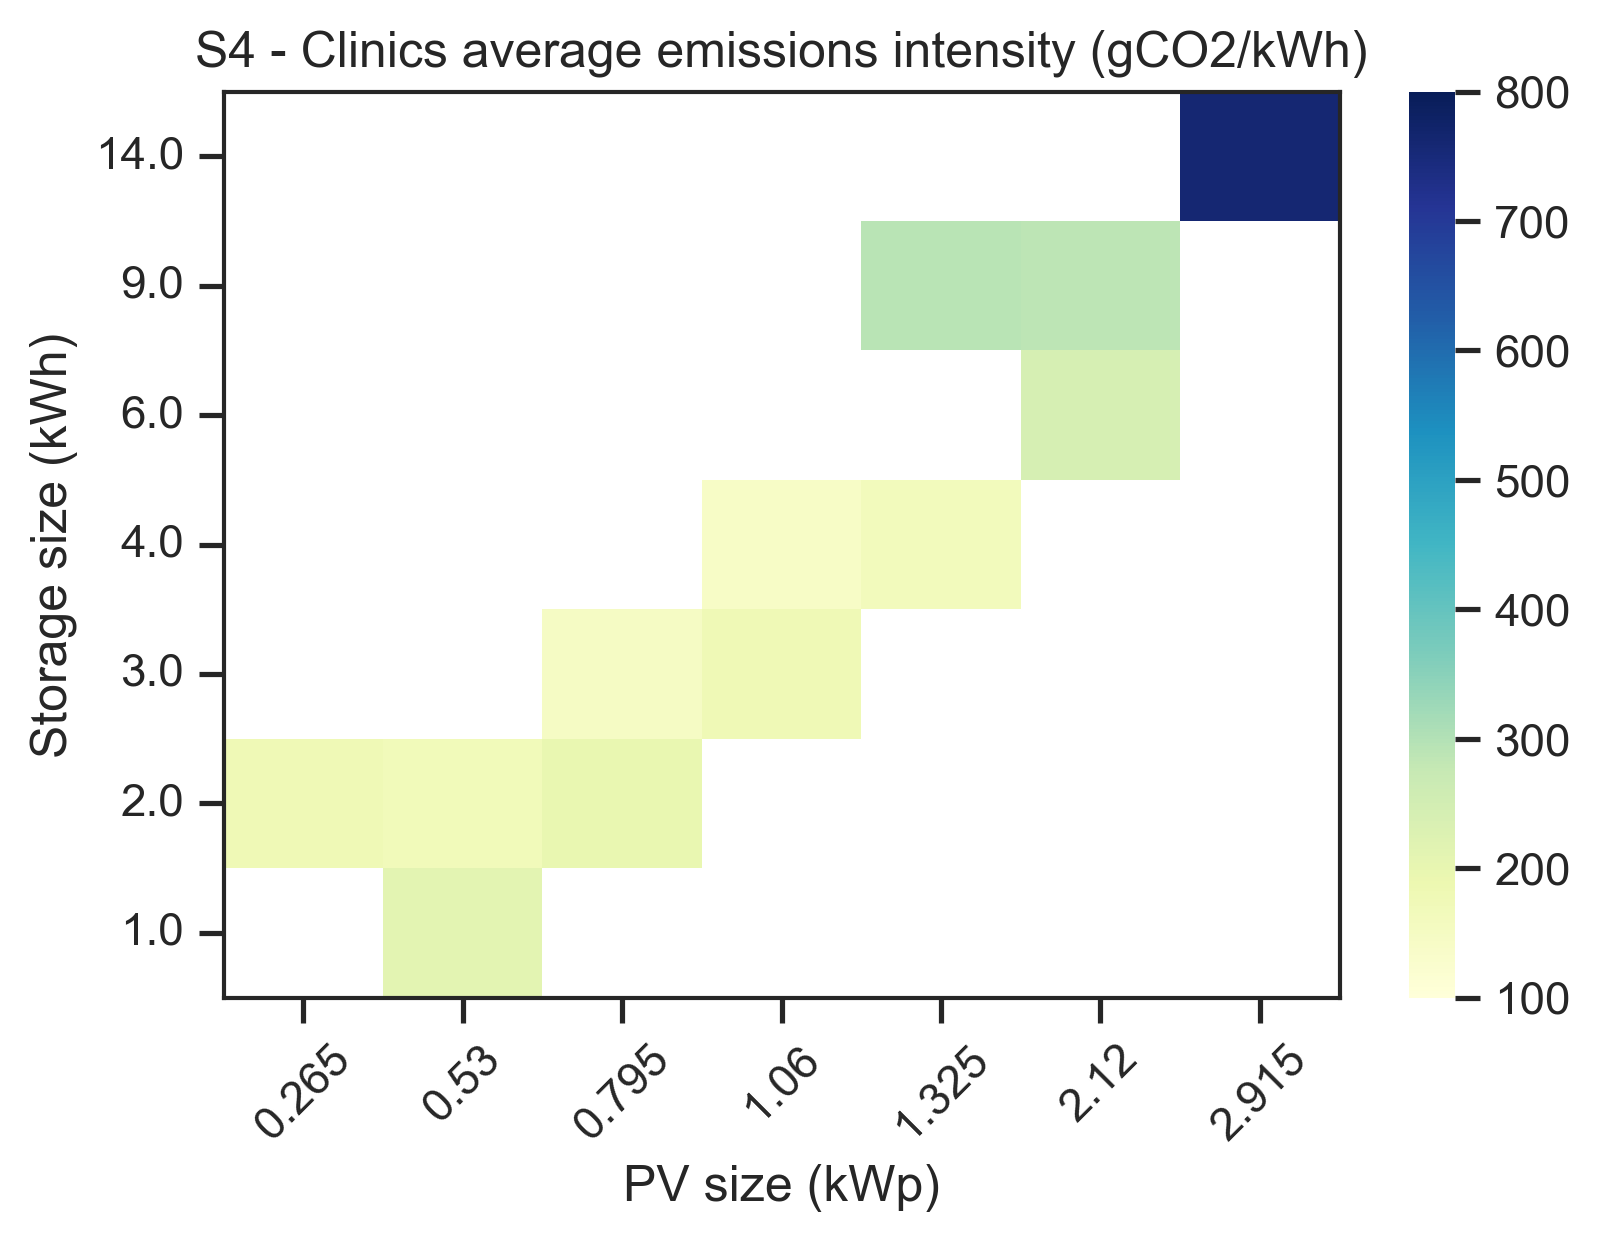

In [36]:
# S4 CLINIC SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(emi_clinics_s4_hp, vmin=100, vmax=800, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

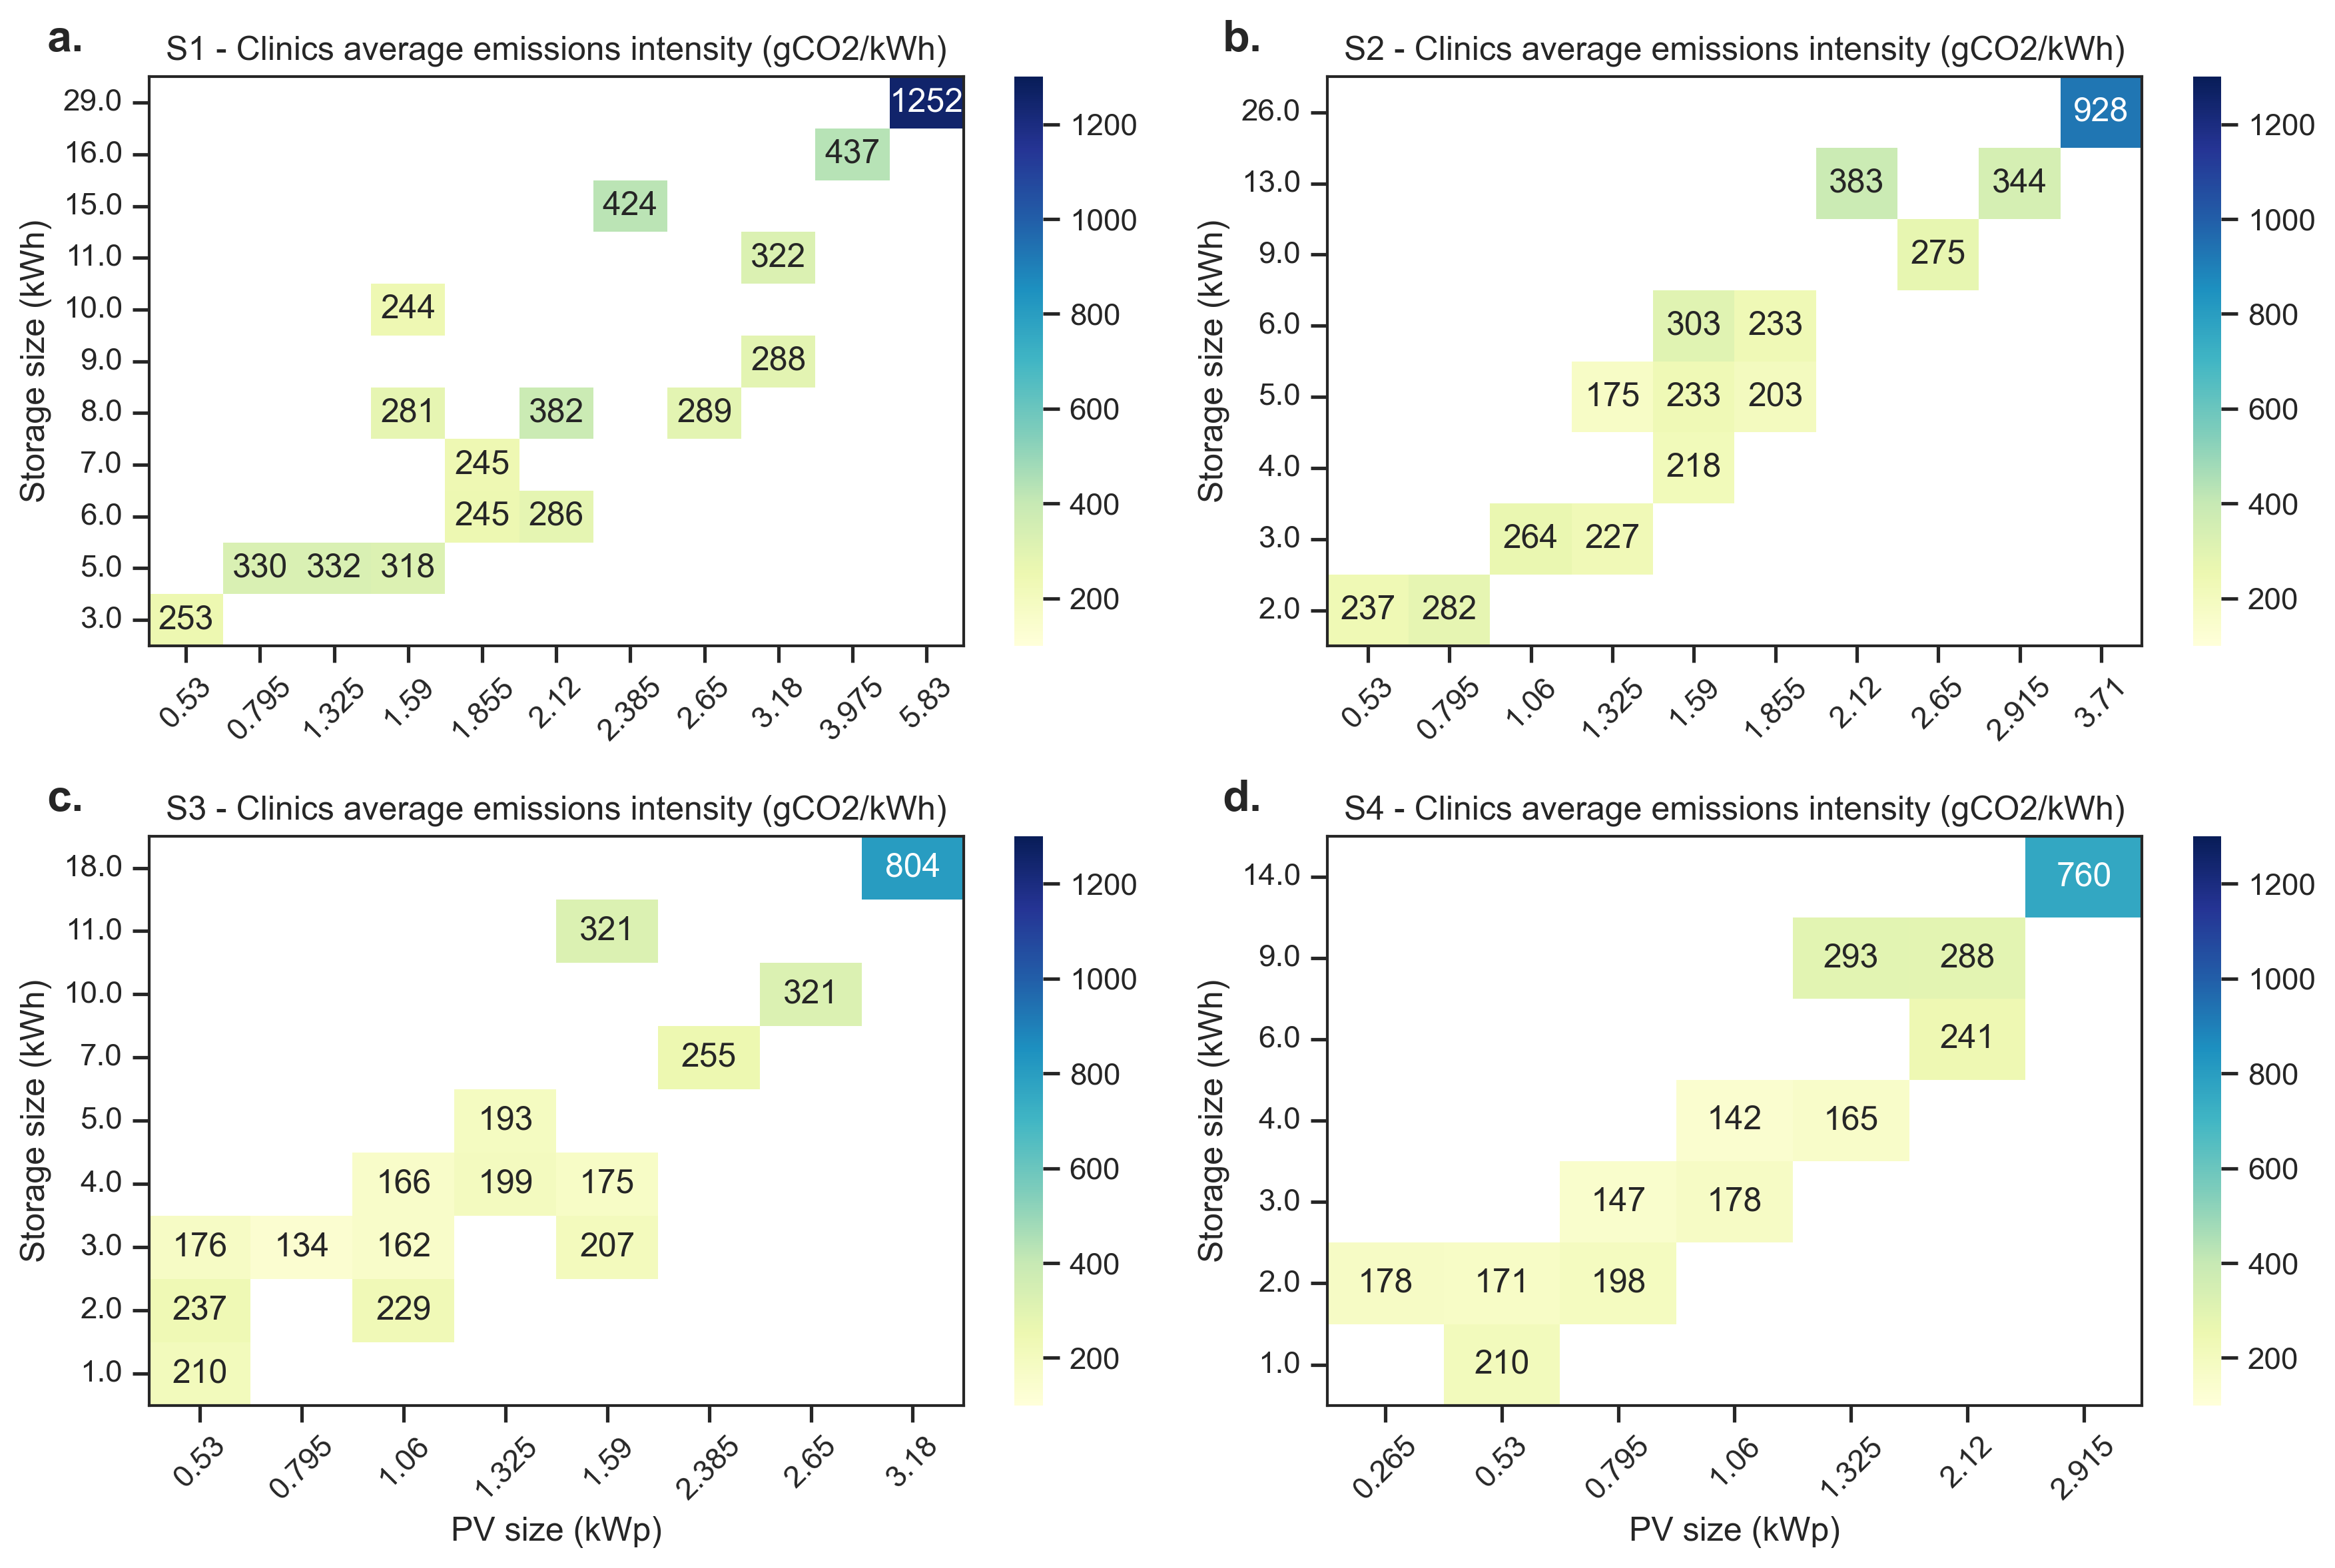

In [37]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., emi_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_clinics_s1_hp, vmin=100, vmax=1300, cmap="YlGnBu", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_clinics_s2_hp, vmin=100, vmax=1300, cmap="YlGnBu", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_clinics_s3_hp, vmin=100, vmax=1300, cmap="YlGnBu", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_clinics_s4_hp, vmin=100, vmax=1300, cmap="YlGnBu", annot=True, fmt=".0f",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

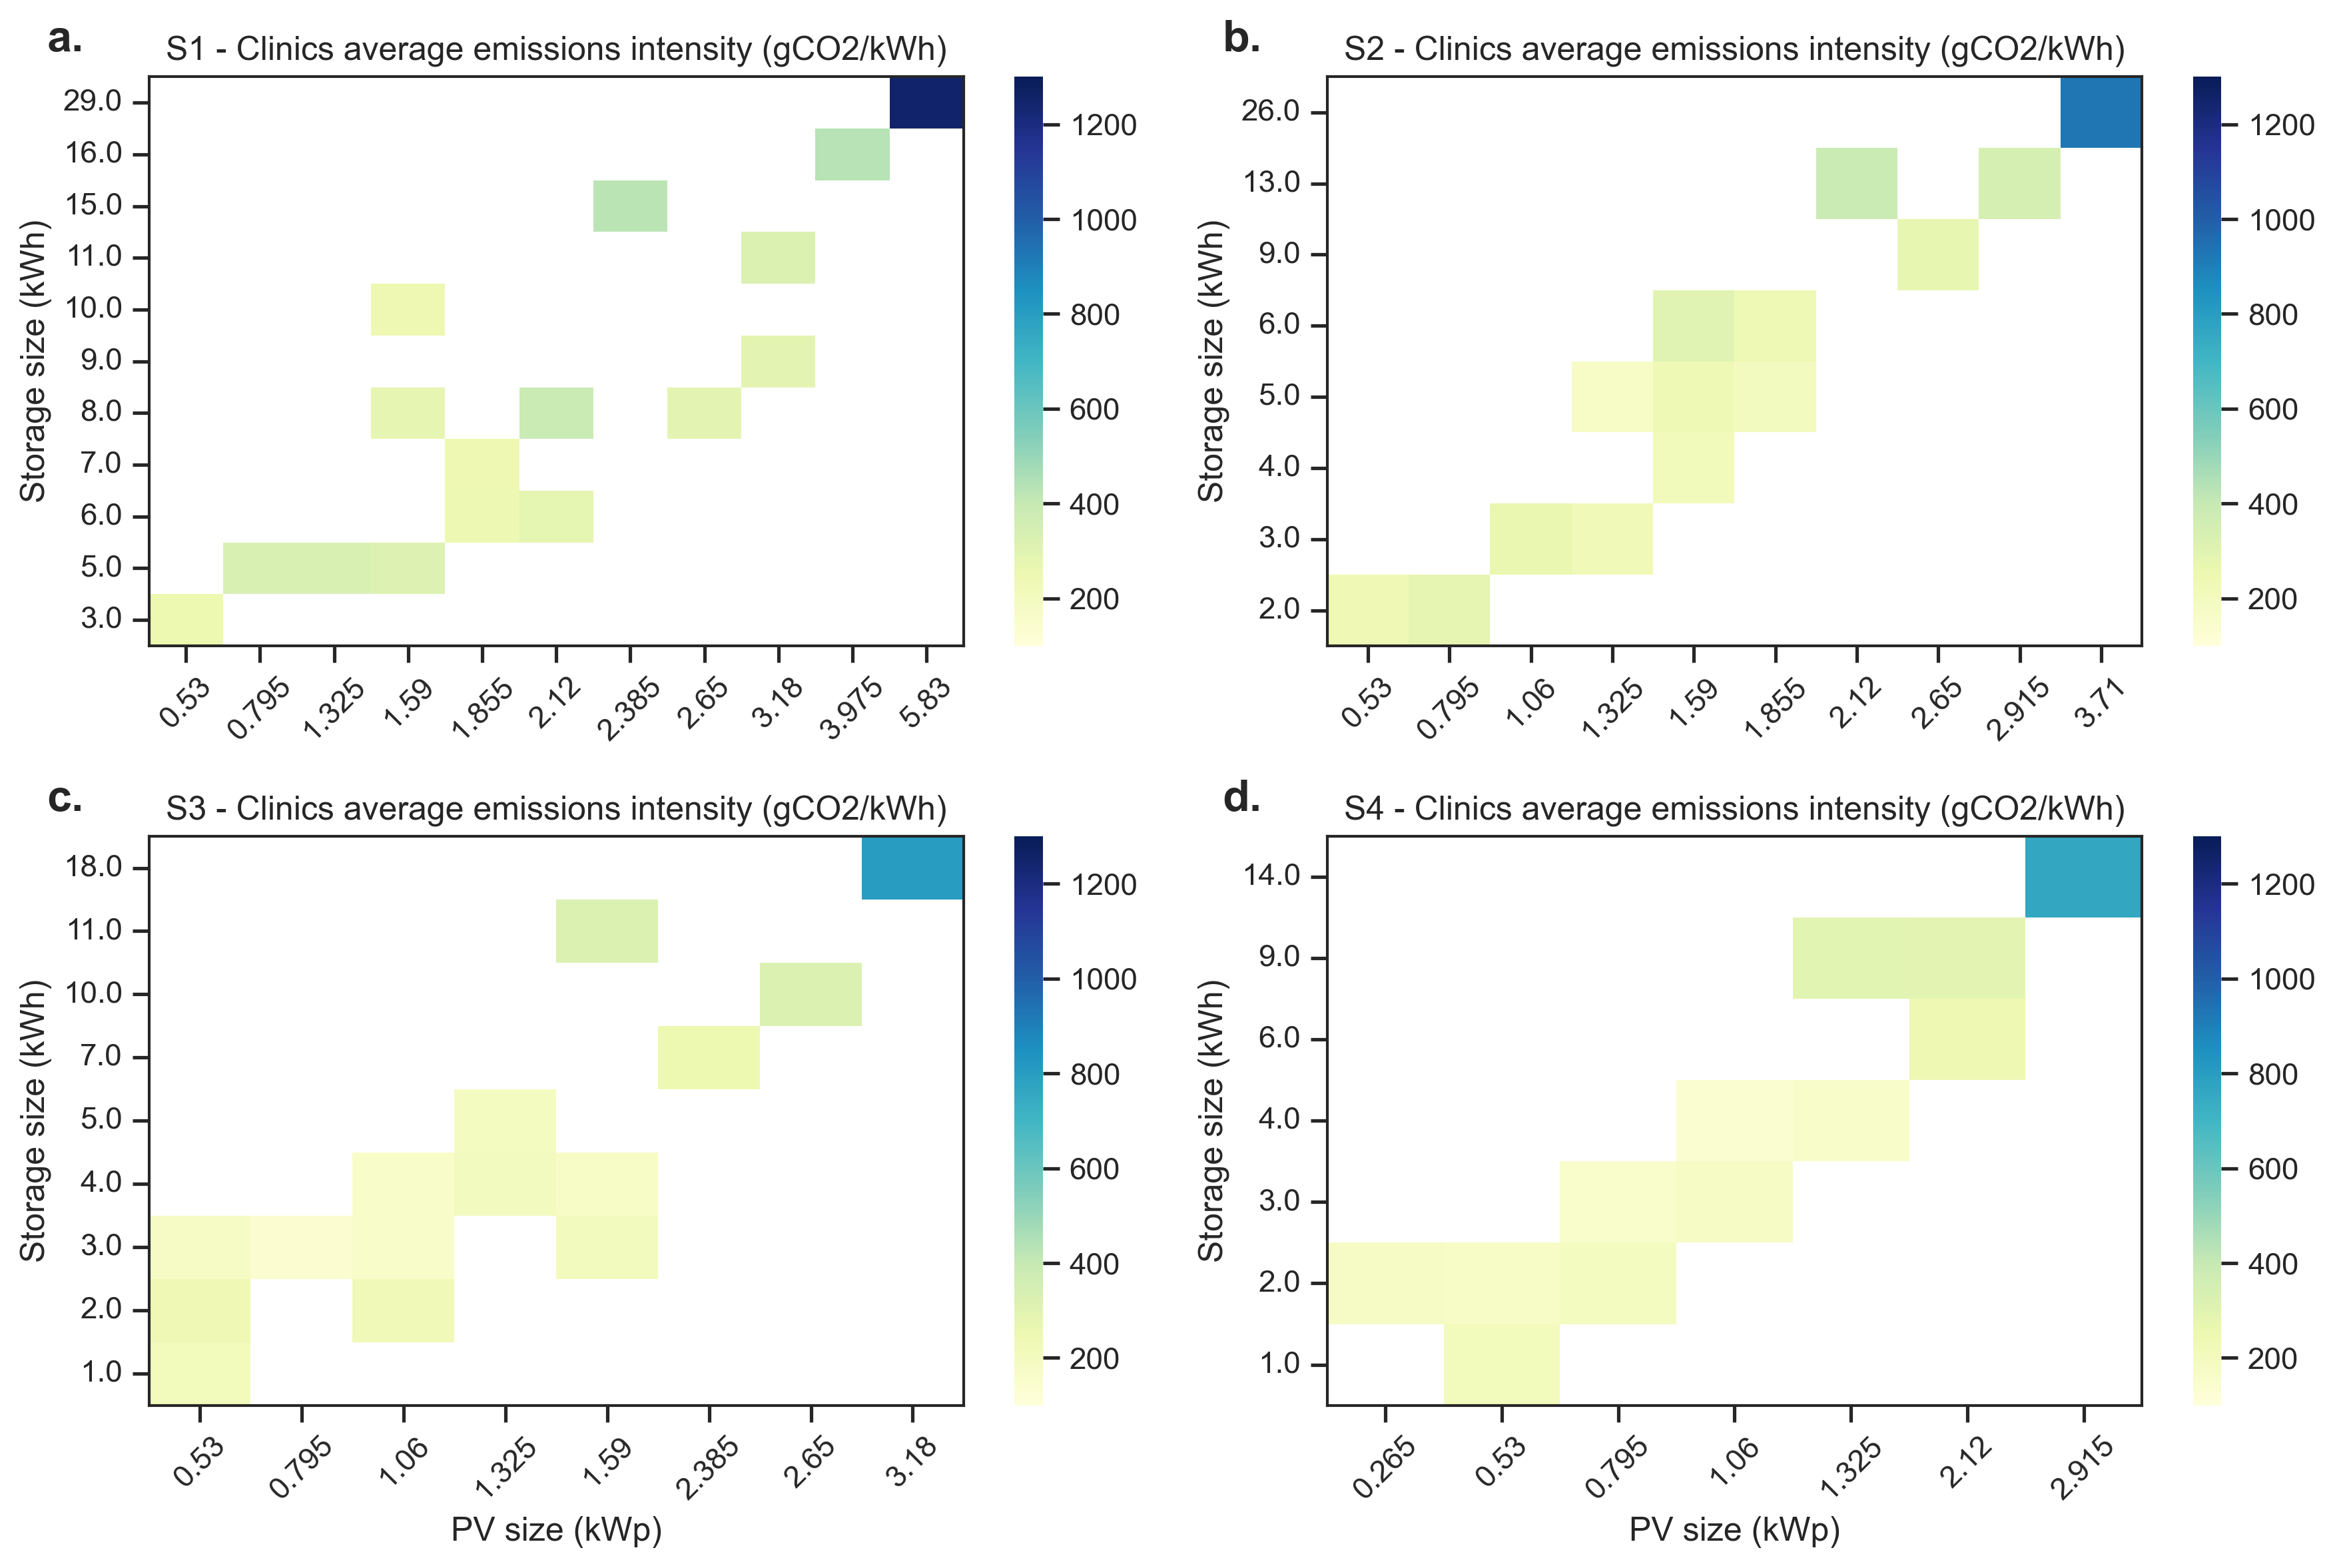

In [38]:
# SAME PLOT AS ABOVE BUT WITHOUT ANNOTATIONS
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., emi_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_clinics_s1_hp, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_clinics_s2_hp, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_clinics_s3_hp, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_clinics_s4_hp, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [39]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS
# S1
emi_clinics_s1_hp_ext = emi_clinics_s1_hp.reindex(range(1,30), axis=0) # fill_value=0
emi_clinics_s1_hp_ext = emi_clinics_s1_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S2
emi_clinics_s2_hp_ext = emi_clinics_s2_hp.reindex(range(1,30), axis=0) # fill_value=0
emi_clinics_s2_hp_ext = emi_clinics_s2_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S3
emi_clinics_s3_hp_ext = emi_clinics_s3_hp.reindex(range(1,30), axis=0) # fill_value=0
emi_clinics_s3_hp_ext = emi_clinics_s3_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S4
emi_clinics_s4_hp_ext = emi_clinics_s4_hp.reindex(range(1,30), axis=0) # fill_value=0
emi_clinics_s4_hp_ext = emi_clinics_s4_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

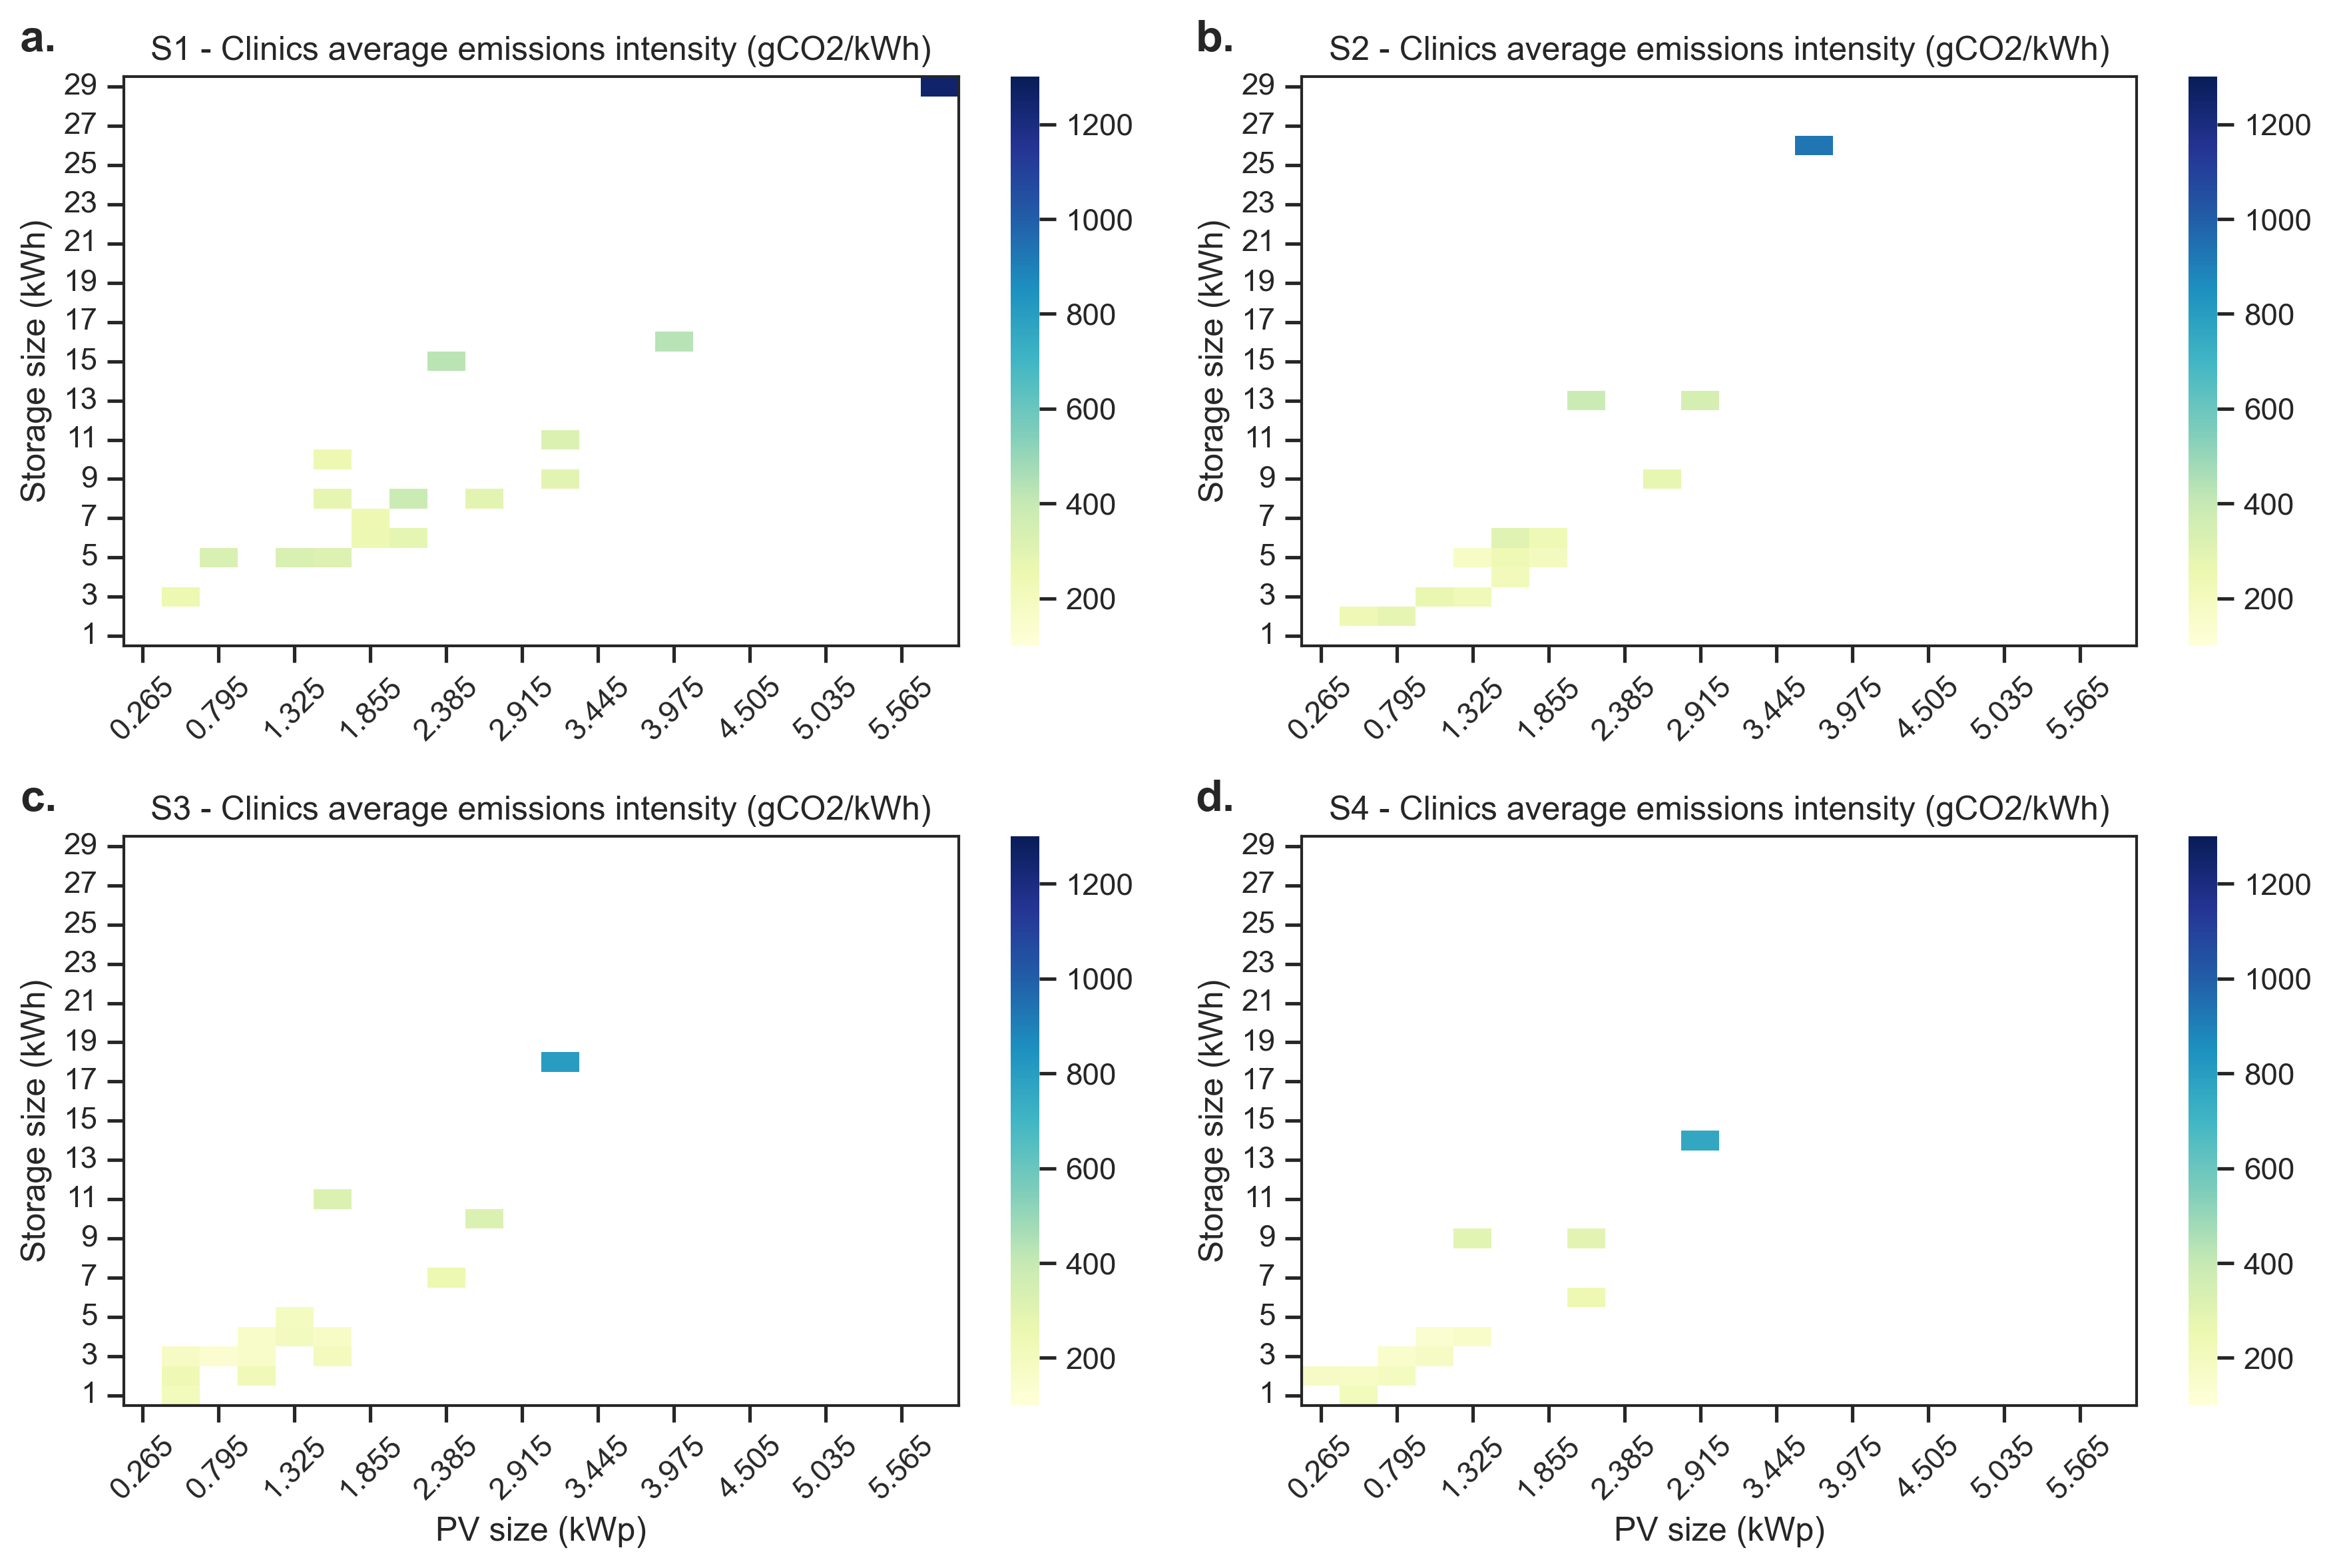

In [40]:
# SUBPLOT BUT EXTENDING AXIS TO HAVE SAME LINEAR AXIS AND WITHOUT "annot=True"
# using new variables created, e.g. "emi_clinics_s4_hp_ext"

# Subplots of S1-S4 with same axis and same colour scale. 
# To make subplots with same axis use variables ending with _ext (e.g., emi_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_clinics_s1_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_clinics_s2_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_clinics_s3_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_clinics_s4_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

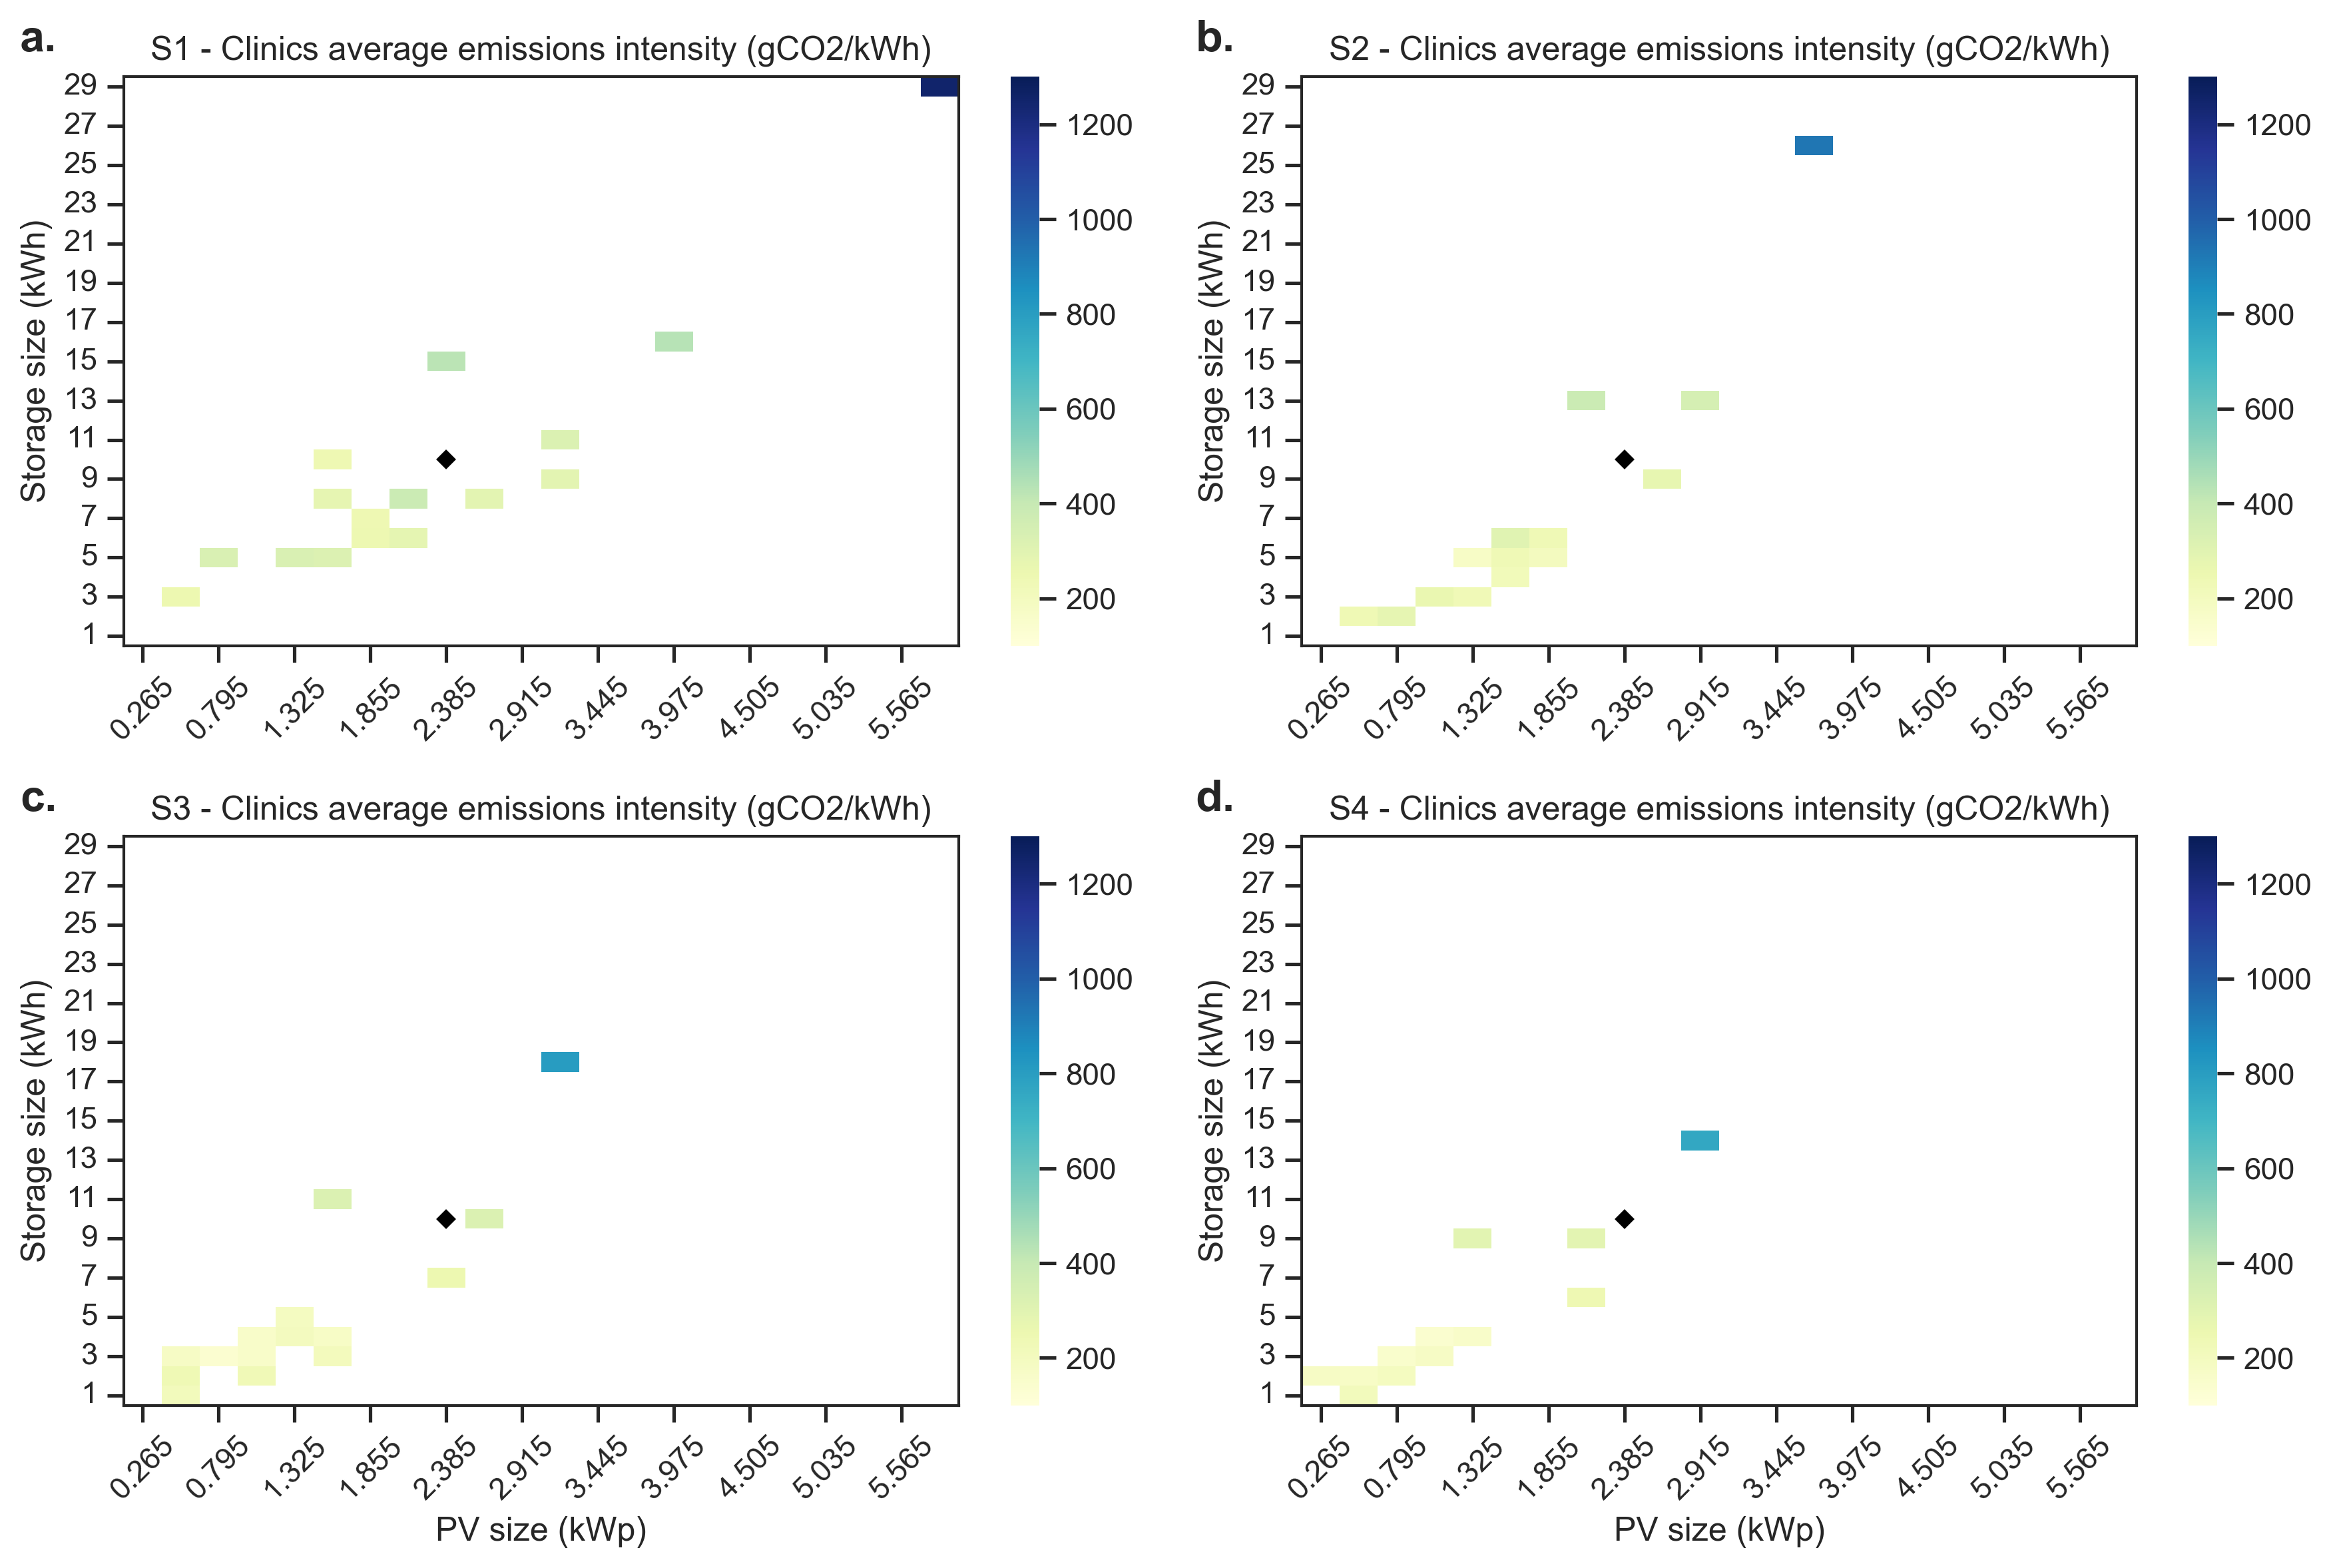

In [41]:
# SAME AS ABOVE BUT ADDING RHINO SYSTEM AS DATA POINT (only system size)
# SUBPLOT BUT EXTENDING AXIS TO HAVE SAME LINEAR AXIS AND WITHOUT "annot=True"
# using new variables created, e.g. "emi_clinics_s4_hp_ext"

# Subplots of S1-S4 with same axis and same colour scale. 
# To make subplots with same axis use variables ending with _ext (e.g., emi_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    emi_clinics_s1_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    emi_clinics_s2_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    emi_clinics_s3_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    emi_clinics_s4_hp_ext, vmin=100, vmax=1300, cmap="YlGnBu",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average emissions intensity (gCO2/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [ ]:
# Last two plots are the final version used so far. So if I need to rerun this plot, don't
# do all the plots again. Just do the last two plots. 
# I added Rhino systems as a data point/marker but this only indicates the system size. 
# I was originally thinking of colouring the diamond marker with the average emissions 
# intensity of clinics in S0 but JN mentioned it didn't make sense to do this bc they are 
# a spread. Instead show (boxplot?) of emission of S0 per institution type.